# **Project Name**    - Transport Demand Prediction
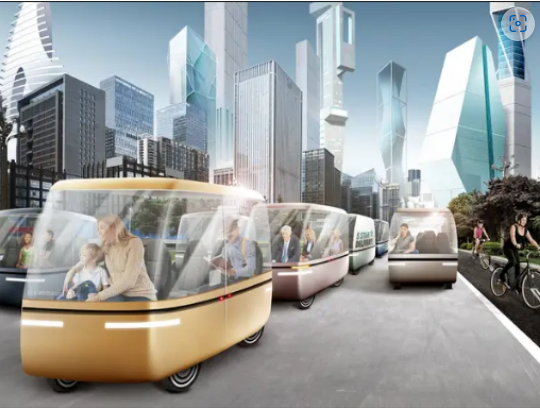



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1 -** Mukta Raut


# **Project Summary -**

* Transport Demand Prediction is a machine learning project that aims to predict the demand for transportation services, such as taxis or ride-sharing services, using regression analysis. In this project, we will be using Python and several popular machine learning libraries, including NumPy, Pandas, Scikit-learn, and Matplotlib.

* The first step in this project is to gather and clean the data. We will be using a dataset that contains information about bus and shuttle trips in and around Nairobi City. 
* Once we have cleaned and preprocessed the data, we will need to select a regression model to use for our predictions. There are several different regression models to choose from, including linear regression, polynomial regression, and ridge regression. We will need to evaluate the performance of each model and select the one that provides the most accurate predictions.

* After selecting a regression model, we will need to train it using the cleaned data. This involves splitting the data into training and testing sets, and then using the training set to fit the model. We will also need to use cross-validation techniques to ensure that our model is not overfitting the data.

* Once our model is trained, we will use it to make predictions about future demand for transportation services. We can then use these predictions to make decisions about how many drivers to allocate to each area, what times to offer promotions or discounts, and other operational decisions.

* Finally, we will evaluate the performance of our model by comparing our predictions to the actual demand for transportation services. We can use metrics such as mean squared error and root mean squared error to evaluate the accuracy of our predictions.

**In summary, the Transport Demand Prediction project is a machine learning project that aims to predict the demand for transportation services using regression analysis. This project involves gathering and cleaning data, selecting a regression model, training the model, making predictions, and evaluating the performance of the model. By accurately predicting the demand for transportation services, we can make informed decisions about operational and marketing strategies, ultimately leading to more efficient and profitable transportation services.**

# **GitHub Link -**

https://github.com/muktaraut12/Regression_Capstone_Project.git 

# **Problem Statement**


### To build a model that predicts the number of seats that mobiticket expects to sell for each ride; that is for a specific route on a specific date and time.


# Problem Description

In the given dataset, there are 14 routes. All of the routes end in Nairobi and originate in towns to the North-West of Nairobi towards Lake Victoria.
The towns from which these routes originate are:
<li>Awendo
<li>Homa Bay
<li>Kehancha
<li>Kendu Bay
<li>Keroka
<li>Keumbu
<li>Kijauri
<li>Kisii
<li>Mbita
<li>Migori
<li>Ndhiwa
<li>Nyachenge
<li>Oyugis
<li>Rodi
<li>Rongo
<li>Sirare
<li>Sori
The routes from these 14 origins to the first stop in the outskirts of Nairobi takes approximately 8 to 9 hours from time of departure. From the first stop in the outskirts of Nairobi into the main bus terminal, where most passengers get off, in Central Business District, takes another 2 to 3 hours depending on traffic.
The three stops that all these routes make in Nairobi (in order) are:
Kawangware: the first stop in the outskirts of Nairobi
Westlands
Afya Centre: the main bus terminal where most passengers disembark
**To predict whether a seat will be booked or not, based on the features given, is our target in this project.

# Data Description

<b> Nairobi_trained_revised.csv is the dataset of tickets purchased from Mobiticket for the 14 routes from “up country” into Nairobi between 17 October 2017 and 20 April 2018. </b>
This dataset includes the variables: ride_id, seat_number, payment_method, payment_receipt, travel_date, travel_time, travel_from, travel_to, car_type, max_capacity.

## <b>Variables description:</b>
#### ride_id: unique ID of a vehicle on a specific route on a specific day and time.
#### seat_number: seat assigned to ticket
#### payment_method: method used by customer to purchase ticket from Mobiticket (cash or Mpesa)
#### payment_receipt: unique id number for ticket purchased from Mobiticket
#### travel_date: date of ride departure. (MM/DD/YYYY)
#### travel_time: scheduled departure time of ride. Rides generally depart on time. (hh:mm)
#### travel_from: town from which ride originated
#### travel_to: destination of ride. All rides are to Nairobi.
#### car_type: vehicle type (shuttle or bus)
#### max_capacity: number of seats on the vehicle

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [46]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


### Dataset Loading

In [47]:
# Load Dataset
df = pd.read_csv("train_revised.csv")

### Dataset First View

In [48]:
# Dataset First Look
df.head(8)

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49
5,5777,18B,Mpesa,B6PBDU30IZ,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
6,5777,14A,Mpesa,MZHGDGS6QZ,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
7,5778,25,Mpesa,MYVTYFNXDZ,27-11-17,7:12,Migori,Nairobi,Bus,49


In [49]:
df[df['travel_from']=='Migori']

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49
7,5778,25,Mpesa,MYVTYFNXDZ,27-11-17,7:12,Migori,Nairobi,Bus,49
8,5778,21B,Mpesa,TE1WYK1NYE,27-11-17,7:12,Migori,Nairobi,Bus,49
...,...,...,...,...,...,...,...,...,...,...
51606,13809,11A,Mpesa,3EWFZJBYXL,20-04-18,8:00,Migori,Nairobi,Bus,49
51631,13809,12A,Mpesa,9K8JD8AYHX,20-04-18,8:00,Migori,Nairobi,Bus,49
51632,13809,10A,Mpesa,BFMH2M3XVQ,20-04-18,8:00,Migori,Nairobi,Bus,49
51641,13809,18A,Mpesa,4PEBSVJSNK,20-04-18,8:00,Migori,Nairobi,Bus,49


### Dataset Rows & Columns count

In [50]:
df[df['max_capacity']!= 49]

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
12,5784,1X,Mpesa,3OPU23FHRB,20-04-18,5:10,Kisii,Nairobi,shuttle,11
13,5789,1X,Mpesa,BPRX4UMFFN,20-04-18,9:50,Kisii,Nairobi,shuttle,11
16,5791,1,Mpesa,HGQURN0SZS,20-04-18,6:00,Kisii,Nairobi,shuttle,11
17,5792,1,Mpesa,8D9V8HK2FC,20-04-18,5:50,Kisii,Nairobi,shuttle,11
18,5793,1,Mpesa,TTZQDYZHAB,20-04-18,10:58,Kisii,Nairobi,shuttle,11
...,...,...,...,...,...,...,...,...,...,...
51107,13761,2,Mpesa,VCDOGNVTG2,27-11-17,5:00,Kisii,Nairobi,shuttle,11
51156,13769,5,Mpesa,PU4LHLHZVC,19-04-18,6:20,Kijauri,Nairobi,shuttle,11
51195,13761,1,Mpesa,AQGYCPOGLQ,27-11-17,5:00,Kisii,Nairobi,shuttle,11
51468,13804,5,Mpesa,D8LAUAHLFB,20-04-18,7:50,Kijauri,Nairobi,shuttle,11


In [51]:
# Dataset Rows & Columns count
df.shape

(51645, 10)

### Dataset Information

In [52]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


#### Duplicate Values

In [53]:
# Dataset Duplicate Value Count

df.duplicated(keep='first').sum()

0

#### Missing Values/Null Values

In [54]:
# Missing Values/Null Values Count
df.isnull().sum()

ride_id            0
seat_number        0
payment_method     0
payment_receipt    0
travel_date        0
travel_time        0
travel_from        0
travel_to          0
car_type           0
max_capacity       0
dtype: int64

# Visualizing the missing values
### As we can see from above information, there are no missing values in the dataset, which is a good thing.


### What did you know about your dataset?

<b> From initial data exploration, we figure out following things - </b>
<ol>
<li> There are <b><u>51645 rows and 10 columns </u></b>in the given dataset.
    <li> <b><u>Numerical columns -</u></b>  ride_id and max_capacity
    <li> <b><u>Categorical columns -</u></b> seat_number, payment_method, payment_receipt, travel_date, travel_time, travel_from, travel_to and car_type  
<li> We have <b><u>no missing values </u></b>in the data
<li> There are <b><u>no duplicated values </u></b>in the dataset.</ol>    

## ***2. Understanding Your Variables***

In [55]:
# Dataset Columns
df.columns

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type',
       'max_capacity'],
      dtype='object')

In [56]:
# Dataset Describe
# Let us describe categorical columns 
df.describe(include='object')

,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type
count,51645,51645,51645,51645,51645,51645,51645,51645
unique,61,2,51645,149,78,17,1,2
top,1,Mpesa,OVDFHJ4659,10-12-17,7:09,Kisii,Nairobi,Bus
freq,2065,51532,1,856,3926,22607,51645,31985


In [57]:
#dataset describe - numerical columns
df.describe()

,ride_id,max_capacity
count,51645.000000,51645.000000
mean,10188.645793,34.534321
std,2211.295708,18.451193
min,1442.000000,11.000000
25%,8287.000000,11.000000
50%,10353.000000,49.000000
75%,12029.000000,49.000000
max,20117.000000,49.000000


### Check Unique Values for each variable.

In [58]:
# We can find unique values in each variable by using describe() function. 

### Variables Description 

<li>ride_id: We can drop this variable as it is an unique ID of a vehicle on a specific route on a specific day and time.
<li>seat_number: seat assigned to a ticket. There are <u>61 unique values</u> in this variable.
<li>payment_method: 2 payment methods are used by customer to purchase ticket from Mobiticket <u>cash or Mpesa</u>. Most use mpesa
<li>payment_receipt: We can drop this variable as it is an unique id number for ticket purchased from Mobiticket.
<li>travel_date: date of ride departure. (MM/DD/YYYY) We have<u> 149 unique travel dates.</u>
<li>travel_time: scheduled departure time of ride. Rides generally depart on time. (hh:mm). there are <u>78 unique    values</u> in here.
We can cmbine above two columns to get a timestamp format.
<li>travel_from: town from which ride originated. here we have <u>17 unique source locations.</u>
<li>travel_to: destination of ride. All rides are to Nairobi. So we can ignore this column as it contains only single value
<li>car_type: vehicle type (shuttle or bus), number of buses are more than shuttle.
<li>max_capacity: number of seats on the vehicle. there are <u>2 unique values </u>- bus has capacity of 49 seats and shuttle has capacity of 11 seats.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [59]:
# Now in order to make our dataset ready for processing, let us drop the column payment_receipt as it is a unique receipt id.
df.drop(['payment_receipt'], axis=1, inplace=True)

In [60]:
# we will  remove the constant feature from the dataset that is travel_to, as all rides have same destination - Nairobi
df.drop(["travel_to"],axis=1,inplace=True)

In [61]:
df.head()

,ride_id,seat_number,payment_method,travel_date,travel_time,travel_from,car_type,max_capacity
0,1442,15A,Mpesa,17-10-17,7:15,Migori,Bus,49
1,5437,14A,Mpesa,19-11-17,7:12,Migori,Bus,49
2,5710,8B,Mpesa,26-11-17,7:05,Keroka,Bus,49
3,5777,19A,Mpesa,27-11-17,7:10,Homa Bay,Bus,49
4,5778,11A,Mpesa,27-11-17,7:12,Migori,Bus,49


### What all manipulations have you done and insights you found?

<li>We have removed the constant feature from our dataset which was travel_to column.
<li> We also deleted payment_receipt column, as it was a unique receipt id for each ticket generated.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

# Univariate Analysis

#### Chart - 1: Analyze the Payment methods

<AxesSubplot:xlabel='payment_method', ylabel='count'>

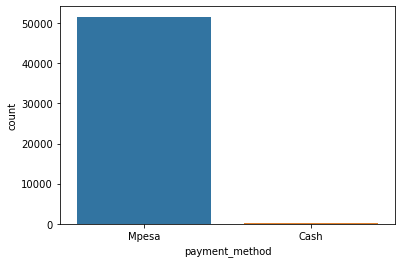

In [62]:
# Chart - 1 visualization code
sns.countplot(df['payment_method'])

In [63]:
df[df['payment_method'] == 'Mpesa'].value_counts().sum()

51532

In [64]:
df[df['payment_method'] == 'Cash'].value_counts().sum()

113

##### 1. Why did you pick the specific chart?

The given variable is Categorical. A count plot show the counts of observations in each categorical bin using bars.

##### 2. What is/are the insight(s) found from the chart?

We observe that most of the travellers pay with Mpesa (51532) as opposed to cash payment (only 113).

##### 3. Will the gained insights help creating a positive business impact? 
The data in this column is highly imbalanced. We will note this for feature engineering to work on this column.

#### Chart - 2 Analyze car_type

<AxesSubplot:xlabel='car_type', ylabel='count'>

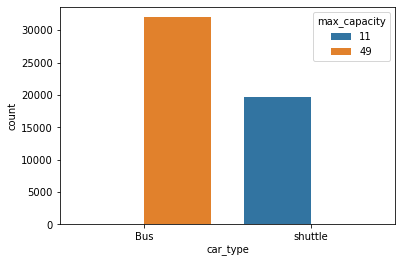

In [65]:
# Chart - 2 visualization code
sns.countplot(df['car_type'], hue=df['max_capacity'])

In [66]:
df[df['car_type'] == 'Bus'].value_counts().sum()

31985

In [67]:
df[df['car_type'] == 'shuttle'].value_counts().sum()

19660

##### 1. Why did you pick the specific chart?

As the column is categorical, we have used count plot. here we can also specify parameter hue=max_capacity to get information about capacity of each type of vehicle.

##### 2. What is/are the insight(s) found from the chart?

We see there are somewhat balanced instances of bus riders and shuttle riders. Capacity of a bus is more. In other words, more number of seats are available for booking in a bus as compared to a shuttle.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Both the categories in the column are equally important for prediction.

#### Chart - 3 Analysis of travel source locations

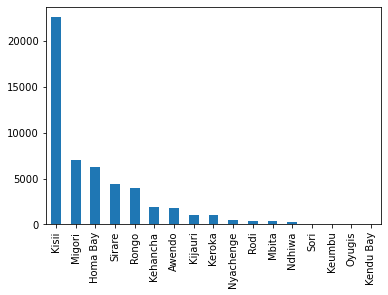

In [68]:
# Chart - 3 visualization code
df['travel_from'].value_counts().plot(kind='bar')
plt.show()

##### 1. Why did you pick the specific chart?

Barplot shows us an estimate of central tendency for a numeric variable with the height of each rectangle. Here we wanted to plot the value counts of each of the source location. So, bar plot is most suitable.

##### 2. What is/are the insight(s) found from the chart?

most of the tickets are booked from Kisii, followed by Migori and Homa Bay. We have <b>least/no bookings from Sori(55), Keumbu(22), Oyugis(5) and Kendu Bay(1).</b>

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The source locations with most value counts contribute more towards total seats booked. <u> Negative growth impact - </u> Seats which are availble from the locations Sori, Keumbu, Oyugis and Kendu Bay may remain vacant.

In [69]:
print("travel from Sori - ", df[df['travel_from'] == 'Sori'].value_counts().sum())
print("travel from Keumbu - ", df[df['travel_from'] == 'Keumbu'].value_counts().sum())
print("travel from Oyugis - ", df[df['travel_from'] == 'Oyugis'].value_counts().sum())
print("travel from Kendu Bay - ", df[df['travel_from'] == 'Kendu Bay'].value_counts().sum())

travel from Sori -  55
travel from Keumbu -  22
travel from Oyugis -  5
travel from Kendu Bay -  1


# Bivariate Analysis

#### Chart - 4 Visualize which type of vehicle is used by travellers in high travel density locations.

<AxesSubplot:xlabel='travel_from', ylabel='count'>

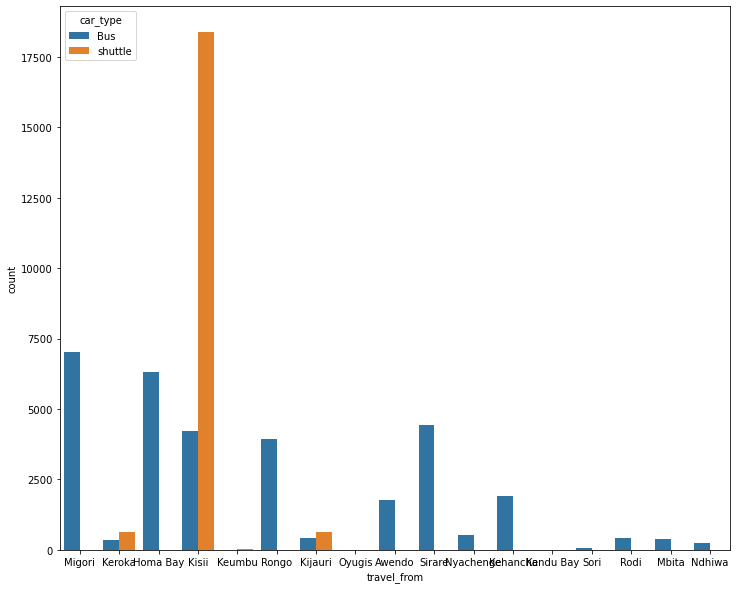

In [70]:
# Chart - 4 visualization code
plt.figure(figsize=(12,10))
sns.countplot(data=df, x="travel_from", hue="car_type")


##### 1. Why did you pick the specific chart?

We needed to find out number of passengers from each source location who travel by Bus and by Shuttle seperatley.

##### 2. What is/are the insight(s) found from the chart?

In [71]:
df['travel_from'].unique()

array(['Migori', 'Keroka', 'Homa Bay', 'Kisii', 'Keumbu', 'Rongo',
       'Kijauri', 'Oyugis', 'Awendo', 'Sirare', 'Nyachenge', 'Kehancha',
       'Kendu Bay', 'Sori', 'Rodi', 'Mbita', 'Ndhiwa'], dtype=object)

<li> From most of the locations, passengers travel by Bus.
<li> Exception for above observation is location Kisii, where number of travellers by Shuttle is significantly more than that of Bus.
<li>  Travellers from Keroka and Kijauri as well prefer Shuttle over Bus.
<li> <b>Highest number of travellers are from Kisii, and they prefer Shuttle.</b>
<li> Travellers from locations 'Homa Bay','Rongo', 'Awendo', 'Sirare', 'Nyachenge', 'Kehancha', 'Sori', 'Rodi', 'Mbita', and 'Ndhiwa' travel only by bus.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

<li> Bus tickets are more likely to be booked from locations Homa Bay','Rongo', 'Awendo', 'Sirare', 'Nyachenge', 'Kehancha', 'Sori', 'Rodi', 'Mbita', and 'Ndhiwa.
<li> Shuttle tickets are more likely to be booked from locations Kisii, Keroka and Kijauri.  
<li> locations where bus is prefered, seats from shuttle will be vacant and will have negative impact on business.    

#### Chart - 5 - Analyze travel_time

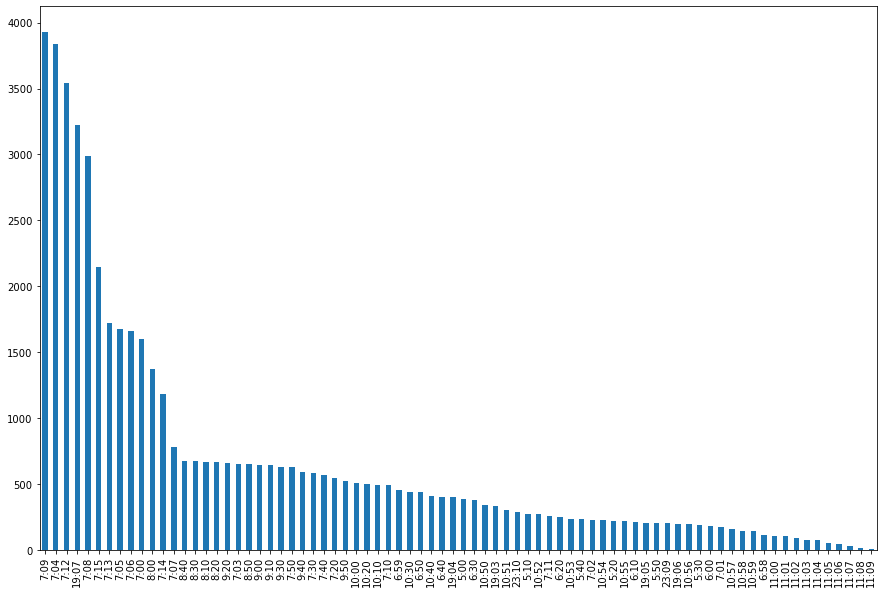

In [72]:
# Chart - 5 visualization code
plt.figure(figsize=(15,10))
df['travel_time'].value_counts().plot(kind='bar')
plt.show()

##### 1. Why did you pick the specific chart?

We needed to plot the number of rides departed at each time in the dataset. A barplot can give us estimate of central tendency for a numeric variable (here number of departures).

##### 2. What is/are the insight(s) found from the chart?

<li> Highest departures are between 7:09 am to 8:30 am. In evening, highest departures are around 7:07 pm.
<li> most of the departures are at morning and evening slots, naturally, as most of the people commute for office and back at these time slots.
<li> We cannot find time slots between 11:00 am and 7:00 pm in the plot.    

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

<li> Demand for tickets is high in the morning and in the evening. In afternoon, there are no tickets booked, as there are no departures.

# Now we need to do some feature engineering in order to get some more visualizations. 

## Finding out the target variable
Since we are not given any target variable, we have to create one. 
<li> Our aim is to predict whether a seat will be booked or not for a particular ride, on a particular date and time.
<li> Now, we have ride_id column, which has unique ride ids for a particular seat number.
<li> Thus, if we group together ride_id, and count seat_number for every ride_id, we will get <b> number_of_tickets</b> for each ride_id   

In [73]:
label=df.groupby(["ride_id"]).seat_number.count().rename("number_of_ticket").reset_index()
label.head()

,ride_id,number_of_ticket
0,1442,1
1,5437,1
2,5710,1
3,5777,5
4,5778,31


## drop duplicated from ride_id column

In [74]:
df=df.drop_duplicates("ride_id")

In [75]:
df.shape

(6249, 8)

### Now, we have two dataframes, df and label. Let us merge both on the common column ride_id

In [76]:
df = df.merge(label, how='left',on='ride_id',)

In [77]:
# delet the columns which are no longer needed
df.drop(['seat_number','payment_method'], axis=1,inplace=True)

In [78]:
df.head(2)

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket
0,1442,17-10-17,7:15,Migori,Bus,49,1
1,5437,19-11-17,7:12,Migori,Bus,49,1


In [79]:
CSVFILE = df.to_csv('GfG.csv', index = True)

In [80]:
df.shape

(6249, 7)

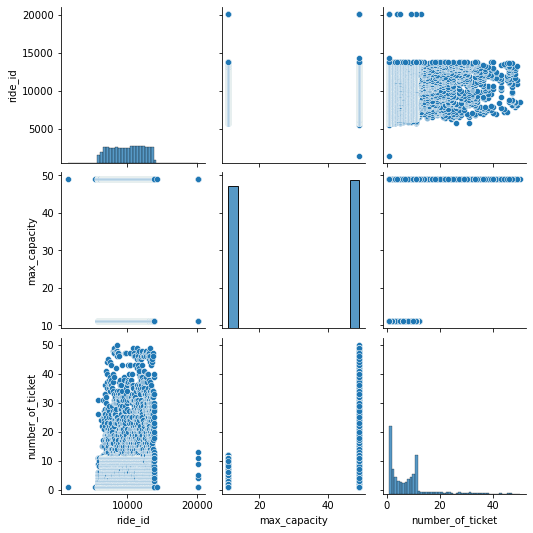

In [81]:
sns.pairplot(df)

## In pairplot, we do not see any linear relationship between dependent and independent variables.

#### Chart - 6 - plot source locations and number_of_tickets

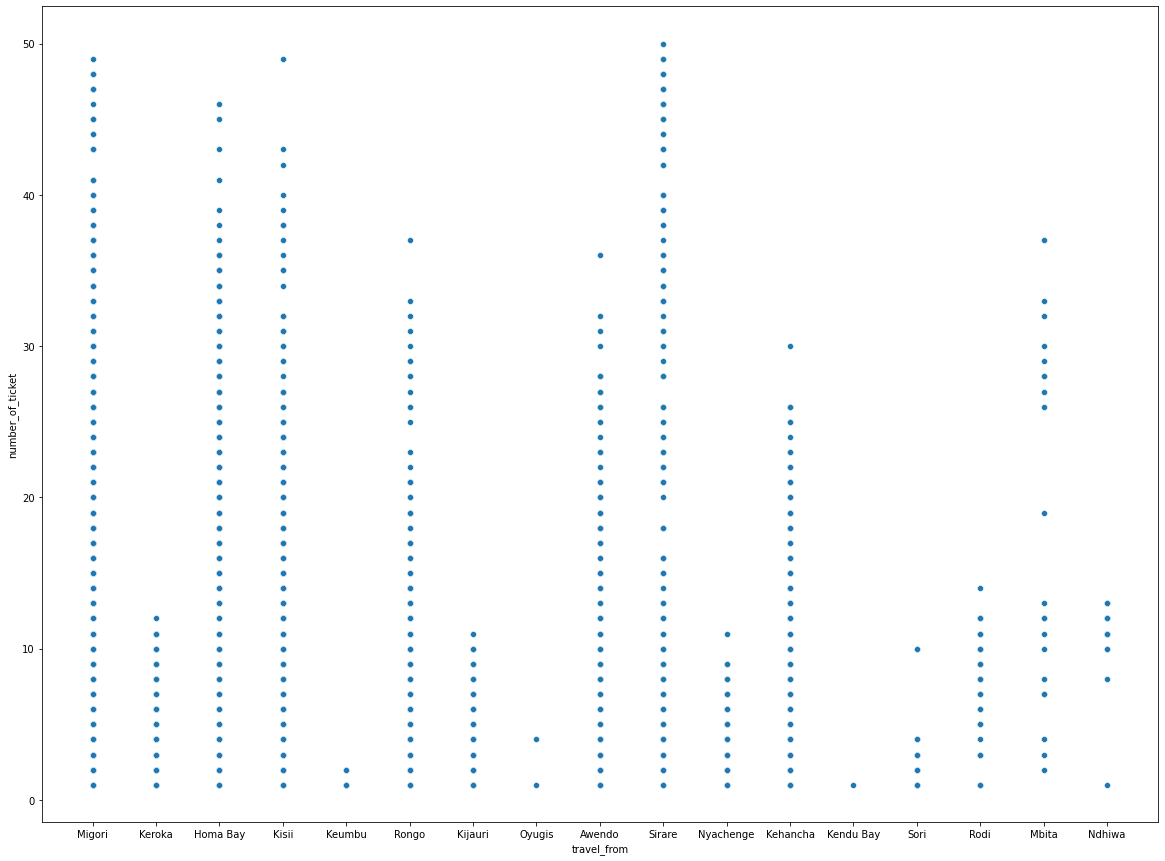

In [82]:
# Chart - 6 visualization code
plt.figure(figsize=(20, 15))

sp = sns.scatterplot(x="travel_from", y="number_of_ticket", data=df)

##### 1. Why did you pick the specific chart?

To find out highest number of tickets according to the source locations, we choose scatter plot.

##### 2. What is/are the insight(s) found from the chart?

<li> Higest number of tickets are booked for rides from locations Sirare, Migori, Homa Bay, Kisii, Awendo, Kehancha.
<li> Lowest number of tickets are booked from location Keumbu, Oyugis, Kendu Bay    

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

<li> Number of tickets are very less for  Keumbu, Oyugis, Kendu Bay.

# Feature Engineering
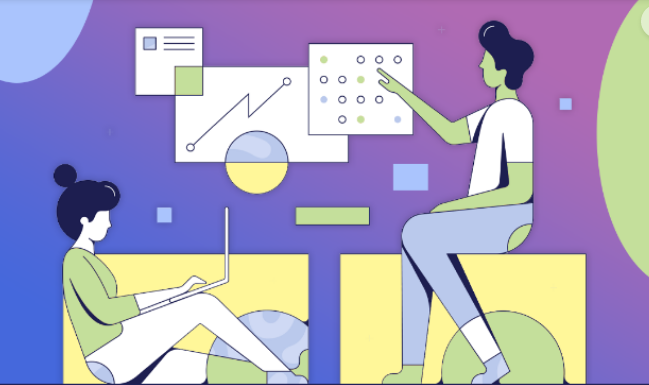

In [83]:
#concatenate travel date and travel time column and make a new feature called date which is same as timestamp format.
df["date"]=df["travel_date"]+ " "+df["travel_time"]

In [84]:
# delet the columns which are no longer needed
df.drop(['travel_date'], axis=1,inplace=True)

In [85]:
df.head()

,ride_id,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date
0,1442,7:15,Migori,Bus,49,1,17-10-17 7:15
1,5437,7:12,Migori,Bus,49,1,19-11-17 7:12
2,5710,7:05,Keroka,Bus,49,1,26-11-17 7:05
3,5777,7:10,Homa Bay,Bus,49,5,27-11-17 7:10
4,5778,7:12,Migori,Bus,49,31,27-11-17 7:12


In [86]:
# now let us create a function to convert date column to datetime format and extract day, month, etc.
def  time_features(df): 

  '''The function takes dataframe as an argument and extracts the
  different features from the date variable of the dataset and finaly returns the updated 
  dataset'''
  
  df["date"]=pd.to_datetime(df["date"])
  df["day_of_week"]=df["date"].dt.dayofweek
  df["day_of_year"]=df["date"].dt.dayofyear
  df["day_of_month"]=df["date"].dt.day
  df["year_woy"]=df["date"].dt.year.astype(str)+df["date"].dt.weekofyear.astype(str)
  df["hour"]=df["date"].dt.hour
  df["minute"]=df["date"].dt.minute
  df["is_weekend"]=df["day_of_week"].apply( lambda x : 1 if x  in [5,6] else 0 )
  df["year"]=df["date"].dt.year
  df["quarter"]=df["date"].dt.quarter
  df["month"]=df["date"].dt.month
  return df

In [87]:
df_new = time_features(df)

In [88]:
# delet the columns which are no longer needed
df.drop(['year_woy'], axis=1,inplace=True)

In [89]:
df.head(2)

,ride_id,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date,day_of_week,day_of_year,day_of_month,hour,minute,is_weekend,year,quarter,month
0,1442,7:15,Migori,Bus,49,1,2017-10-17 07:15:00,1,290,17,7,15,0,2017,4,10
1,5437,7:12,Migori,Bus,49,1,2017-11-19 07:12:00,6,323,19,7,12,1,2017,4,11


In [90]:
# create a new column for calculating travel time
df_new["travel_time"] = df_new["travel_time"].str.split(':').apply(lambda x: int(x[0]) + int(x[1])/60)

In [91]:
# create a new column period which shows day time 
df_new['period'] = np.nan

In [92]:
df_new.loc[df_new.travel_time < 7, 'period'] = 'sunup'
df_new.loc[(df_new.travel_time >= 7) & (df_new.travel_time < 11), 'period'] = 'am'
df_new.loc[(df_new.travel_time >= 11) & (df_new.travel_time < 15), 'period'] = 'mid'
df_new.loc[(df_new.travel_time >= 15) & (df_new.travel_time < 19), 'period'] = 'eve'
df_new.loc[(df_new.travel_time >= 19) & (df_new.travel_time <= 24), 'period'] = 'sundown'

In [93]:
pcount = dict(df_new['period'].value_counts())
pcount

{'am': 4888, 'sunup': 988, 'sundown': 286, 'mid': 87}

In [94]:
# create hourly_travellers. we use map function which assignes travellers count to each daytime
df_new['hourly_travelers'] = np.log1p(df_new['period'].map(pcount))

In [95]:
dcount = dict(df_new["day_of_year"].value_counts())
df_new["daily_travelers"] = np.log1p(df_new["day_of_year"].map(dcount))
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6249 entries, 0 to 6248
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ride_id           6249 non-null   int64         
 1   travel_time       6249 non-null   float64       
 2   travel_from       6249 non-null   object        
 3   car_type          6249 non-null   object        
 4   max_capacity      6249 non-null   int64         
 5   number_of_ticket  6249 non-null   int64         
 6   date              6249 non-null   datetime64[ns]
 7   day_of_week       6249 non-null   int64         
 8   day_of_year       6249 non-null   int64         
 9   day_of_month      6249 non-null   int64         
 10  hour              6249 non-null   int64         
 11  minute            6249 non-null   int64         
 12  is_weekend        6249 non-null   int64         
 13  year              6249 non-null   int64         
 14  quarter           6249 n

#### Chart - 7 tickets booked Daywise

<AxesSubplot:xlabel='day_of_month', ylabel='number_of_ticket'>

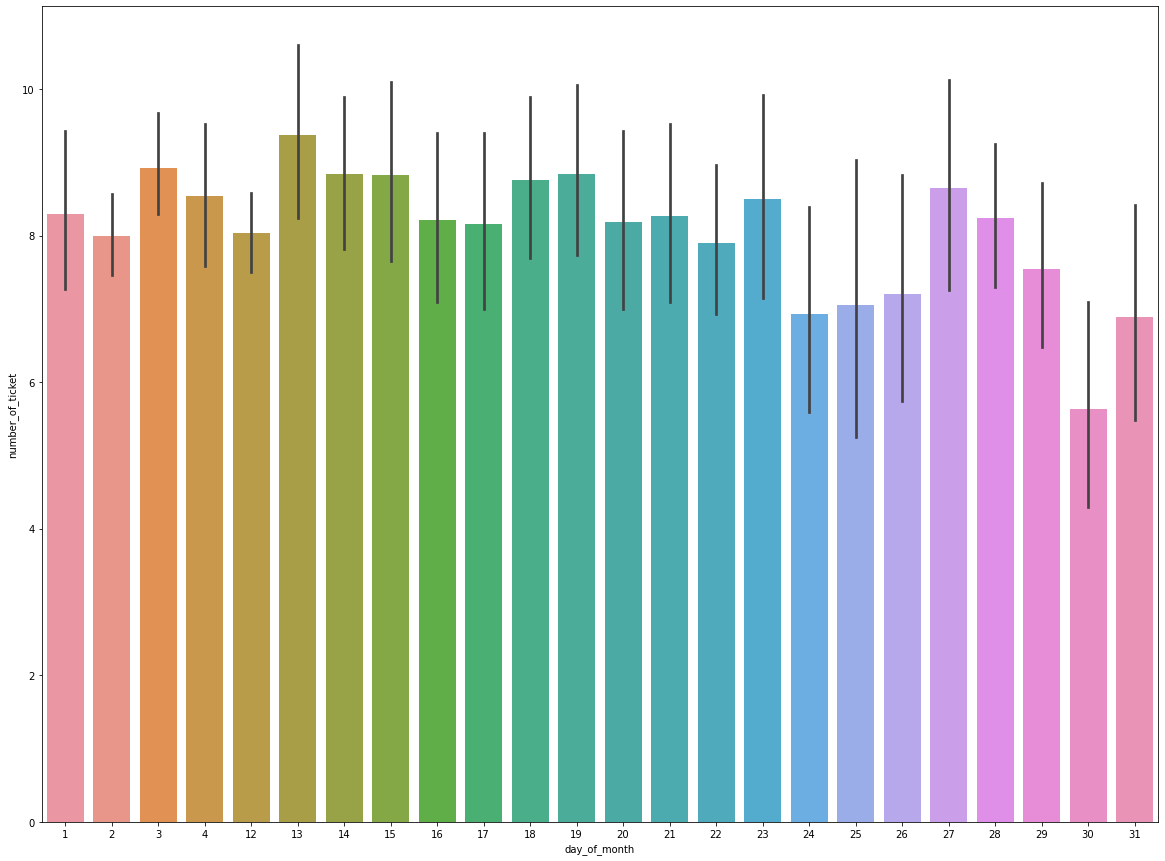

In [96]:
# Chart - 7 visualization code
plt.figure(figsize=(20, 15))
sns.barplot(x='day_of_month', y="number_of_ticket", data=df_new)

##### 1. Why did you pick the specific chart?

we have to plot numerical value for each day of month. Barplot will give us clean visualization

##### 2. What is/are the insight(s) found from the chart?

<li> there are plots missing for dates 5 to 11.
<li> for other dates, the distribution is almost uniform, except on 30th.

#### Chart - 8 - Hourwise number of tickets booked

<AxesSubplot:xlabel='hour', ylabel='number_of_ticket'>

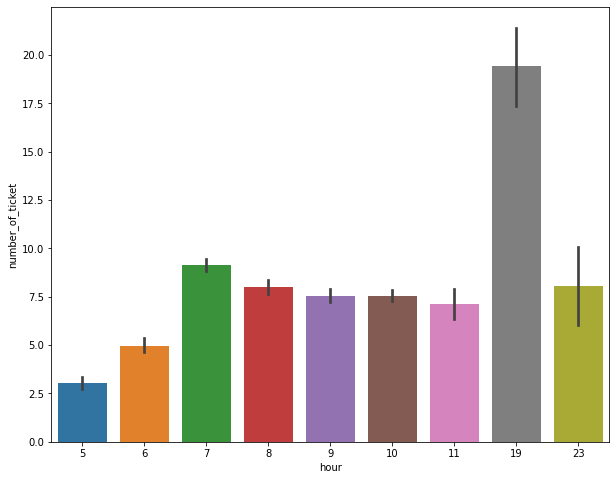

In [97]:
# Chart - 8 visualization code
plt.figure(figsize=(10, 8))
sns.barplot(x='hour', y="number_of_ticket", data=df_new)

##### 2. What is/are the insight(s) found from the chart?

<li>  Most of the ticktes were booked between 7 AM and 8 PM, most likely because in the morning most of the people go to the work and office.

<li> There is no ride between 12pm to 5.30Pm

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Between 12 pm and 5:30 pm, possibility of a ticket getting booked is none.

#### Chart - 9 Number of tickets booked on each day of week

<AxesSubplot:xlabel='day_of_week', ylabel='number_of_ticket'>

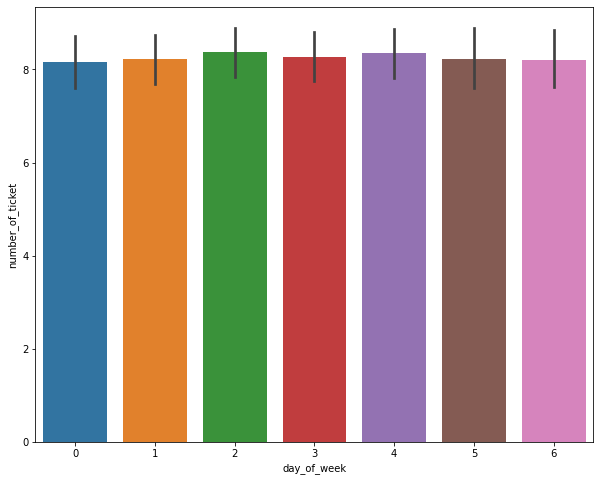

In [98]:
# Chart - 9 visualization code

plt.figure(figsize=(10, 8))
sns.barplot(x='day_of_week', y="number_of_ticket", data=df_new)


##### 2. What is/are the insight(s) found from the chart?

distribution of tickets booked on all days of week is uniform

#### Chart - 10 is there any rise or drop in ticket bookings in 2 years?

<AxesSubplot:xlabel='year', ylabel='number_of_ticket'>

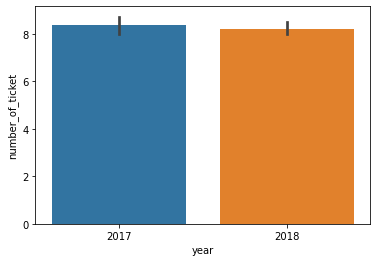

In [99]:
# Chart - 10 visualization code
sns.barplot(x='year', y="number_of_ticket", data=df_new)


##### 2. What is/are the insight(s) found from the chart?

## There is no significant rise or drop in ticket bookings in two years.

In [100]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6249 entries, 0 to 6248
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ride_id           6249 non-null   int64         
 1   travel_time       6249 non-null   float64       
 2   travel_from       6249 non-null   object        
 3   car_type          6249 non-null   object        
 4   max_capacity      6249 non-null   int64         
 5   number_of_ticket  6249 non-null   int64         
 6   date              6249 non-null   datetime64[ns]
 7   day_of_week       6249 non-null   int64         
 8   day_of_year       6249 non-null   int64         
 9   day_of_month      6249 non-null   int64         
 10  hour              6249 non-null   int64         
 11  minute            6249 non-null   int64         
 12  is_weekend        6249 non-null   int64         
 13  year              6249 non-null   int64         
 14  quarter           6249 n

In [101]:
new_cols = ['day_of_year','daily_travelers','minute','day_of_month','hourly_travelers','is_weekend','day_of_week']
transport_df=df_new.copy()
transport_df.head()

,ride_id,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date,day_of_week,day_of_year,day_of_month,hour,minute,is_weekend,year,quarter,month,period,hourly_travelers,daily_travelers
0,1442,7.250000,Migori,Bus,49,1,2017-10-17 07:15:00,1,290,17,7,15,0,2017,4,10,am,8.494743,0.693147
1,5437,7.200000,Migori,Bus,49,1,2017-11-19 07:12:00,6,323,19,7,12,1,2017,4,11,am,8.494743,0.693147
2,5710,7.083333,Keroka,Bus,49,1,2017-11-26 07:05:00,6,330,26,7,5,1,2017,4,11,am,8.494743,0.693147
3,5777,7.166667,Homa Bay,Bus,49,5,2017-11-27 07:10:00,0,331,27,7,10,0,2017,4,11,am,8.494743,3.871201
4,5778,7.200000,Migori,Bus,49,31,2017-11-27 07:12:00,0,331,27,7,12,0,2017,4,11,am,8.494743,3.871201


# Handling imbalanced data

In [102]:
# count values in month column
transport_df.month.value_counts()

12    1050
2      985
1      896
3      853
4      600
11     414
9      262
7      254
8      251
10     247
6      225
5      212
Name: month, dtype: int64

In [103]:
# we need to convert the uneven distributed values into equal sized bins
dict_cov = {12:1,2:1,1:1,2:1,4:2,11:2,9:3,7:3,8:3,10:3,6:3,5:3}
transport_df['month'].replace(dict_cov,inplace=True)

In [104]:
# count values in month column
transport_df.month.value_counts()

1    2931
3    2304
2    1014
Name: month, dtype: int64

In [105]:
transport_df.day_of_month.unique()

array([17, 19, 26, 27, 20, 18, 16, 15, 14, 13,  4, 28, 31, 30, 29, 25, 24,
       23, 22, 21, 12,  3,  2,  1], dtype=int64)

In [106]:
# data balancing
conv_dict = {17:2, 19:2, 26:3, 27:3, 20:2, 18:2, 16:2, 15:2, 14:2, 13:2,  4:1, 28:2, 31:3, 30:3, 29:3, 25:3, 24:3,
       23:3, 22:3, 21:3, 12:1,  3:1,  2:1,  1:2}
transport_df['day_of_month'].replace(conv_dict,inplace=True)

In [107]:
transport_df['day_of_month'].value_counts()

1    2496
2    2305
3    1448
Name: day_of_month, dtype: int64

In [108]:
transport_df.head()

,ride_id,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date,day_of_week,day_of_year,day_of_month,hour,minute,is_weekend,year,quarter,month,period,hourly_travelers,daily_travelers
0,1442,7.250000,Migori,Bus,49,1,2017-10-17 07:15:00,1,290,2,7,15,0,2017,4,3,am,8.494743,0.693147
1,5437,7.200000,Migori,Bus,49,1,2017-11-19 07:12:00,6,323,2,7,12,1,2017,4,2,am,8.494743,0.693147
2,5710,7.083333,Keroka,Bus,49,1,2017-11-26 07:05:00,6,330,3,7,5,1,2017,4,2,am,8.494743,0.693147
3,5777,7.166667,Homa Bay,Bus,49,5,2017-11-27 07:10:00,0,331,3,7,10,0,2017,4,2,am,8.494743,3.871201
4,5778,7.200000,Migori,Bus,49,31,2017-11-27 07:12:00,0,331,3,7,12,0,2017,4,2,am,8.494743,3.871201


## Find out distance 
 let us find the distance of each origin point from the distination point. I used Nirobi Map to estimate the distance from origin point to destination map.

In [109]:
distance = {'Migori': 370 , 'Keroka': 280, 'Homa Bay':360, 'Kisii':305.1, 'Keumbu':295, 'Rongo':332,
'Kijauri':271, 'Oyugis':330.6, 'Awendo':351, 'Sirare':392, 'Nyachenge':326, 'Kehancha': 387.7,
'Kendu Bay':347, 'Sori':399, 'Rodi':348, 'Mbita':401, 'Ndhiwa': 371}
transport_df["travel_from_distance"]=transport_df.travel_from.map(distance)

In [110]:
time = {'Migori': 7*60+8 , 'Keroka': 5*60, 'Homa Bay':7*60, 'Kisii':5*60+34, 'Keumbu':5*60+20, 'Rongo':6*60+21,
'Kijauri':60*4+50,'Oyugis':5*60+50, 'Awendo':6*60+38, 'Sirare':7*60+30, 'Nyachenge':6*60+10, 'Kehancha':7*60+10,
'Kendu Bay':6*60+10, 'Sori':7*60+30, 'Rodi':6*60+40, 'Mbita':7*60+23, 'Ndhiwa': 7*60}
transport_df["travel_from_time"]=transport_df.travel_from.map(time)

In [111]:
transport_df["Speed"]=transport_df.travel_from_time/transport_df.travel_from_distance

#### Chart - 11 speed and number of tickets

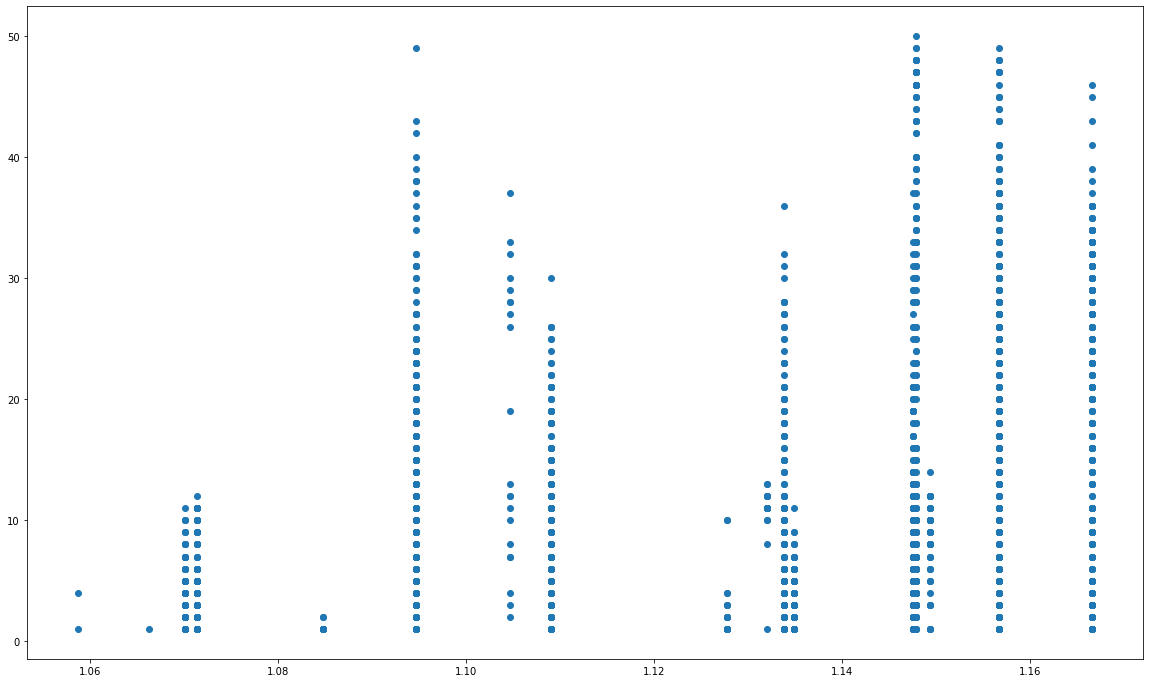

In [112]:
# Chart - 11 visualization code
plt.figure(figsize=(20,12))
plt.scatter(transport_df['Speed'],transport_df['number_of_ticket'])
plt.show()

##### 2. What is/are the insight(s) found from the chart?

## Speed is an influencing factor for number of tickets booked. So we note down to explore it further

In [113]:
transport_df.head()

,ride_id,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date,day_of_week,day_of_year,day_of_month,...,is_weekend,year,quarter,month,period,hourly_travelers,daily_travelers,travel_from_distance,travel_from_time,Speed
0,1442,7.250000,Migori,Bus,49,1,2017-10-17 07:15:00,1,290,2,...,0,2017,4,3,am,8.494743,0.693147,370.0,428,1.156757
1,5437,7.200000,Migori,Bus,49,1,2017-11-19 07:12:00,6,323,2,...,1,2017,4,2,am,8.494743,0.693147,370.0,428,1.156757
2,5710,7.083333,Keroka,Bus,49,1,2017-11-26 07:05:00,6,330,3,...,1,2017,4,2,am,8.494743,0.693147,280.0,300,1.071429
3,5777,7.166667,Homa Bay,Bus,49,5,2017-11-27 07:10:00,0,331,3,...,0,2017,4,2,am,8.494743,3.871201,360.0,420,1.166667
4,5778,7.200000,Migori,Bus,49,31,2017-11-27 07:12:00,0,331,3,...,0,2017,4,2,am,8.494743,3.871201,370.0,428,1.156757


In [114]:
from datetime import datetime
from datetime import timedelta

In [168]:
# time = {'Migori': 7*60+8 , 'Keroka': 5*60, 'Homa Bay':7*60, 'Kisii':5*60+34, 'Keumbu':5*60+20, 'Rongo':6*60+21,
# 'Kijauri':60*4+50,'Oyugis':5*60+50, 'Awendo':6*60+38, 'Sirare':7*60+30, 'Nyachenge':6*60+10, 'Kehancha':7*60+10,
# 'Kendu Bay':6*60+10, 'Sori':7*60+30, 'Rodi':6*60+40, 'Mbita':7*60+23, 'Ndhiwa': 7*60}
# for key in time.keys(): 
#     time[key]=timedelta( minutes=time[key])

# #find the date of traveling from origin 
# transport_df["Date_of_traveling_from_origin"]=transport_df.travel_from.map(time)

# # find the date of arrival at distination
# transport_df["arrival_date"]=transport_df.date+ transport_df.Date_of_traveling_from_origin
# transport_df["hod_arrived_date"]=transport_df["arrival_date"].dt.hour
# transport_df["minute_arrived_date"]=transport_df["arrival_date"].dt.minute
# del transport_df["Date_of_traveling_from_origin"],transport_df["arrival_date"]
# transport_df["is_rush_hour"]=0
# transport_df.loc[transport_df.hod_arrived_date.between(7,17),"is_rush_hour"]=1

#### Chart - 14 - Correlation Heatmap

<AxesSubplot:>

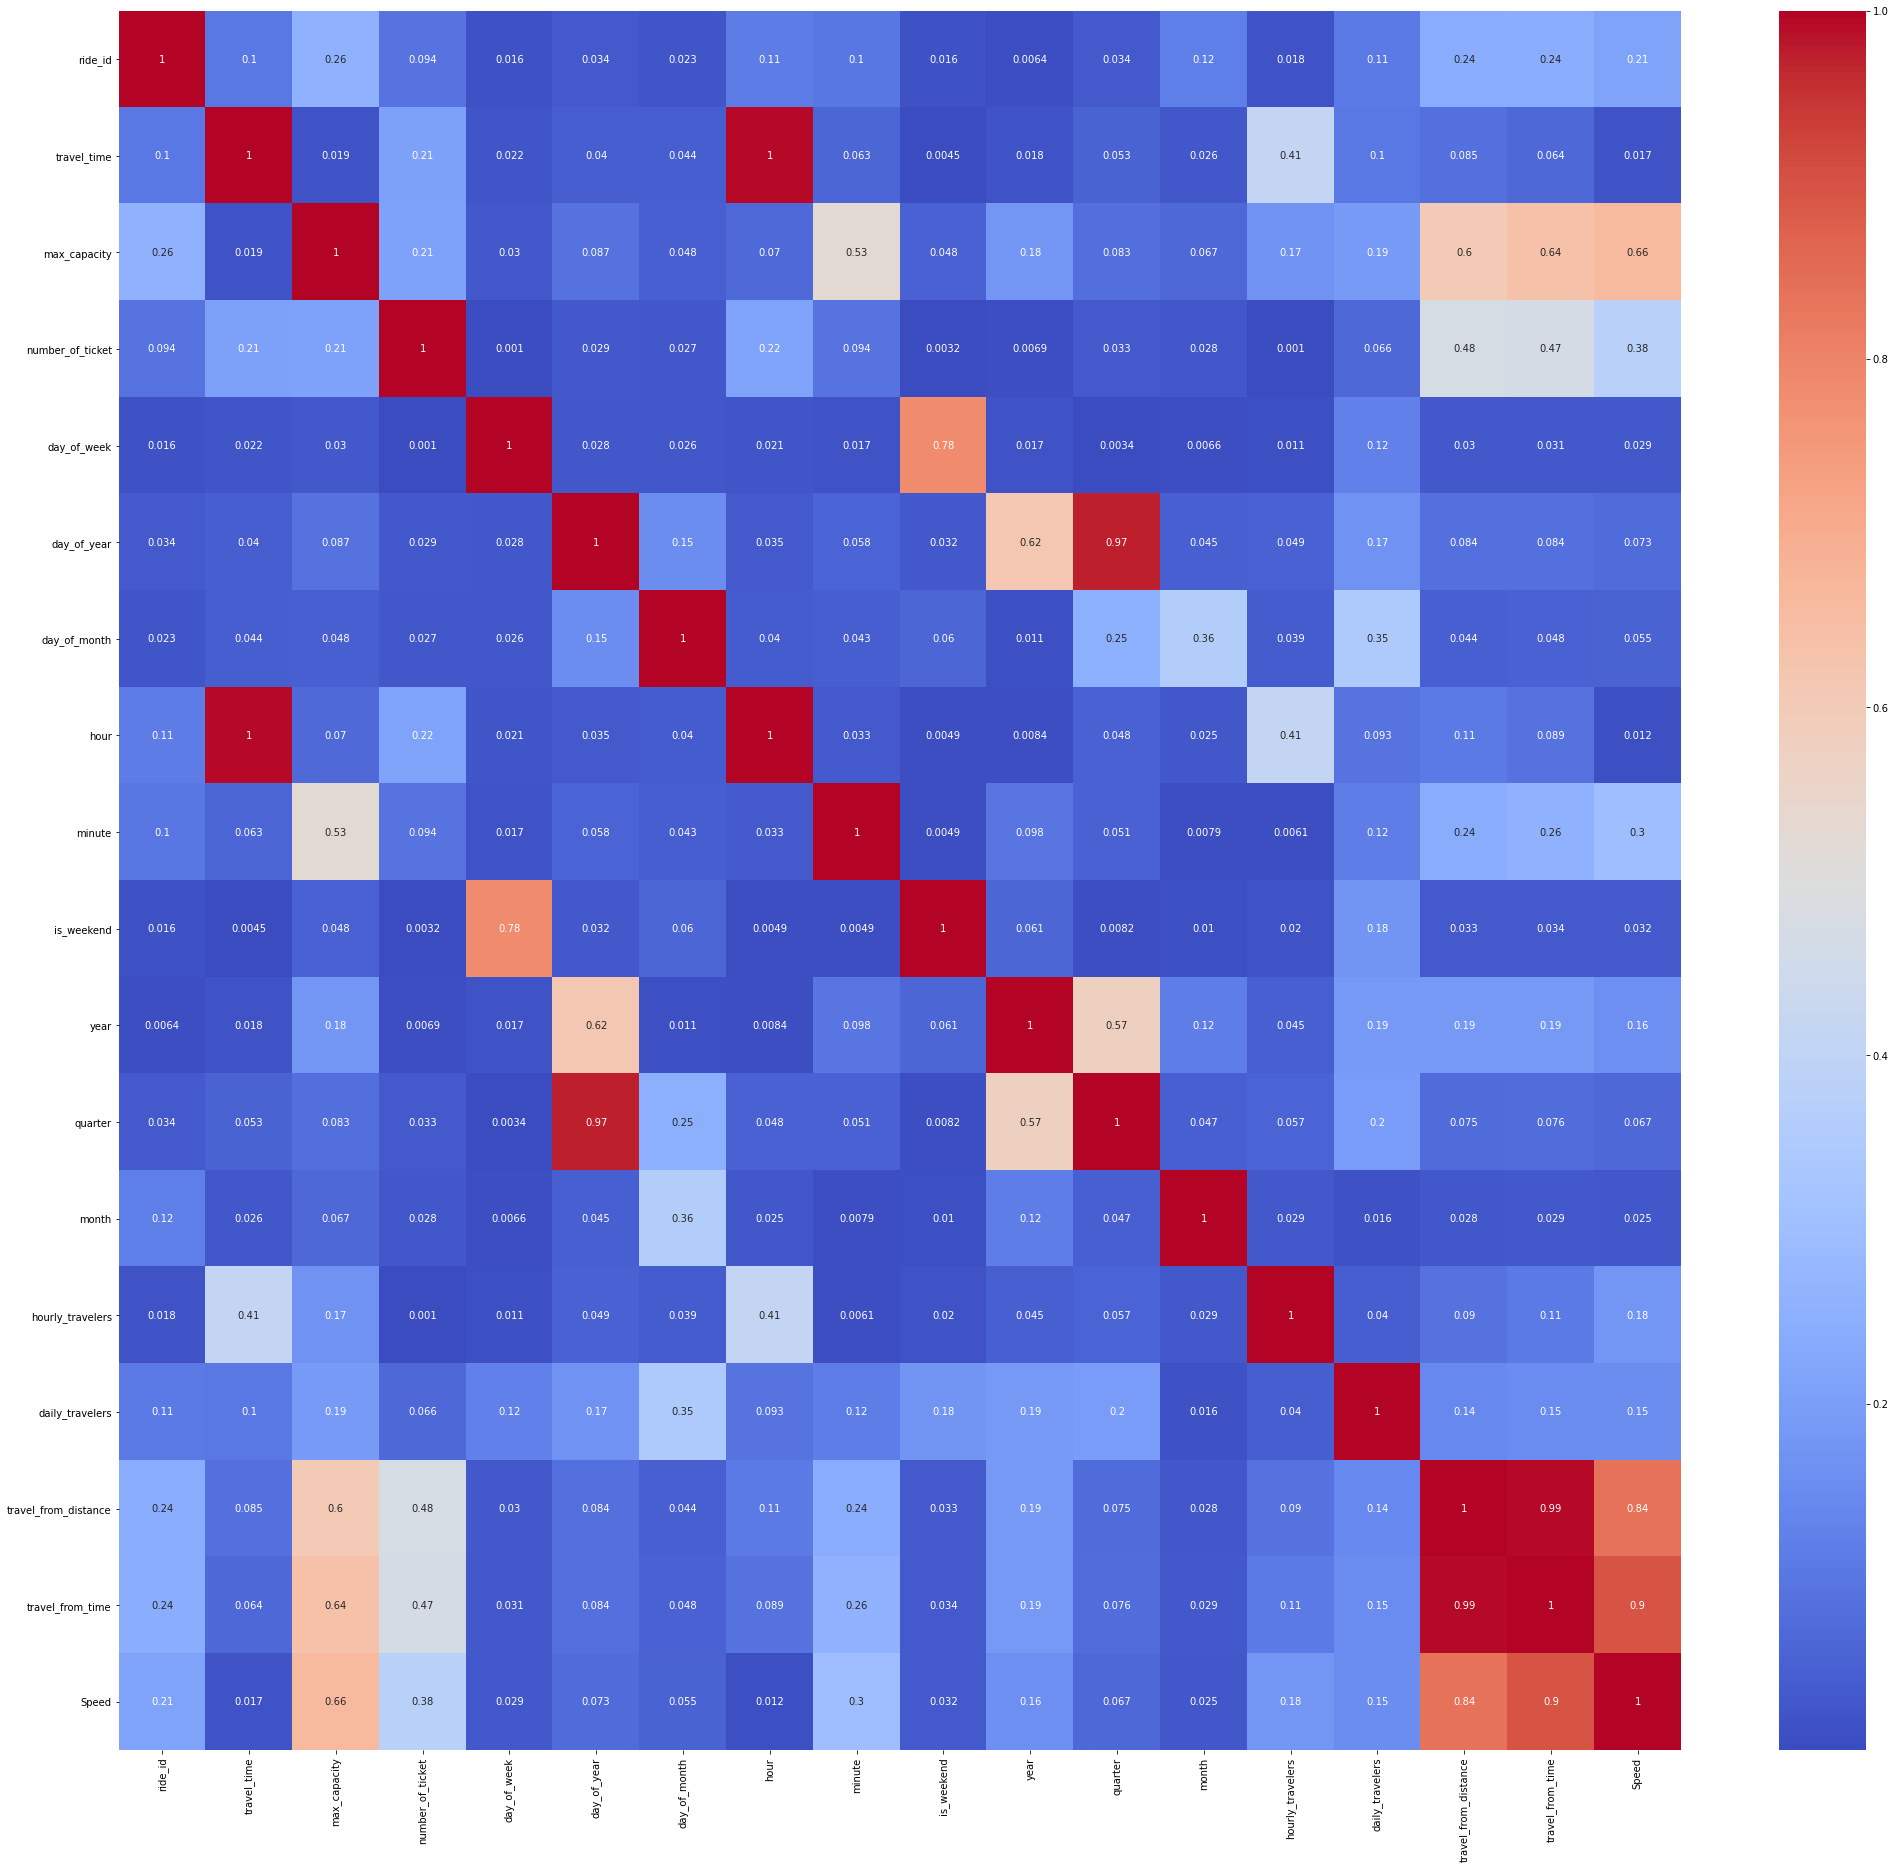

In [115]:
# Correlation Heatmap visualization code
transport_df_corr = transport_df.corr()
fig = plt.figure(figsize=(35,32))
ax = fig.gca()
sns.heatmap(abs(transport_df_corr), annot=True, cmap='coolwarm')


# Check for multicolinearity
## calculate variance inflation factor

In [116]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [171]:
# pd.set_option('display.float_format', '{:.2f}'.format)

In [ ]:
#calc_vif(transport_df[[i for i in transport_df.describe().columns if i not in ['number_of_ticket']]])

* We observe very high vif for following columns - travel_from_distance	(211608.67), travel_from_time	(214212.14),Speed	(222773.28), year (216119.73).
* We also observe some variables have vif = infinity. This shows perfect multicolinearity between independent variables, hour, minute and travel time.So we need to drop some of them.
* By cross checking the correlation of the variables with each other and with target variable, we decide to eliminate few of those.


<AxesSubplot:>

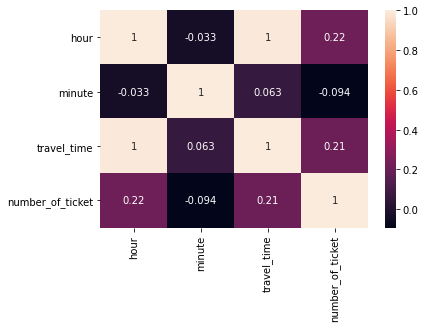

In [117]:
sns.heatmap((transport_df[['hour','minute','travel_time','number_of_ticket']]).corr(), annot=True)

### Here we can keep variable hour and drop variables minute and travel_time

<AxesSubplot:>

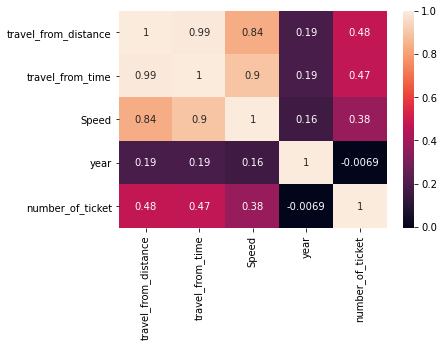

In [118]:
sns.heatmap((transport_df[['travel_from_distance', 'travel_from_time','Speed','year','number_of_ticket']]).corr(), annot=True)

#### By observing the correlation between dependant variables and target variable, and with help of data visualization observations, we decided to drop following variables with high vif.

In [119]:
calc_vif(transport_df[[i for i in transport_df.describe().columns if i not in ['number_of_ticket','minute','travel_time','year','travel_from_time','travel_from_time']]])

,variables,VIF
0,ride_id,22.133930
1,max_capacity,5.631745
2,day_of_week,8.333314
3,day_of_year,70.130140
4,day_of_month,11.671573
5,hour,10.394095
6,is_weekend,3.600487
7,quarter,112.237930
8,month,6.660681
9,hourly_travelers,104.447999


### now let us take a look at following variables with high vif
<ul>
<li>hourly_travelers 175.87
<li>travel_from_distance 310.66
<li>Speed	1234.60
<li>is_rush_hour 566.11  </ul>  


<AxesSubplot:>

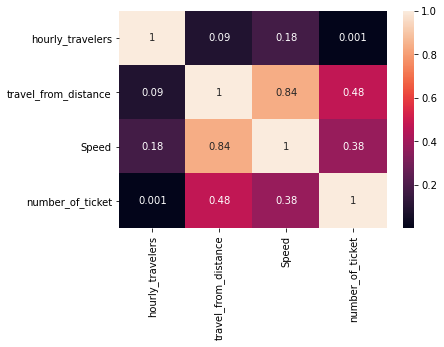

In [120]:
sns.heatmap((transport_df[['hourly_travelers','travel_from_distance', 'Speed','number_of_ticket']]).corr(), annot=True)

In [121]:
'hourly_travelers','travel_from_distance', 'Speed', 'is_rush_hour','number_of_ticket'

('hourly_travelers',
 'travel_from_distance',
 'Speed',
 'is_rush_hour',
 'number_of_ticket')

In [122]:
calc_vif(transport_df[[i for i in transport_df.describe().columns if i not in ['number_of_ticket','minute','travel_time','day_of_year','year','travel_from_time','hourly_travelers']]])

,variables,VIF
0,ride_id,22.124507
1,max_capacity,5.569938
2,day_of_week,8.322249
3,day_of_month,9.238985
4,hour,8.601836
5,is_weekend,3.578847
6,quarter,4.504798
7,month,6.412498
8,daily_travelers,126.762626
9,travel_from_distance,232.244003


<AxesSubplot:>

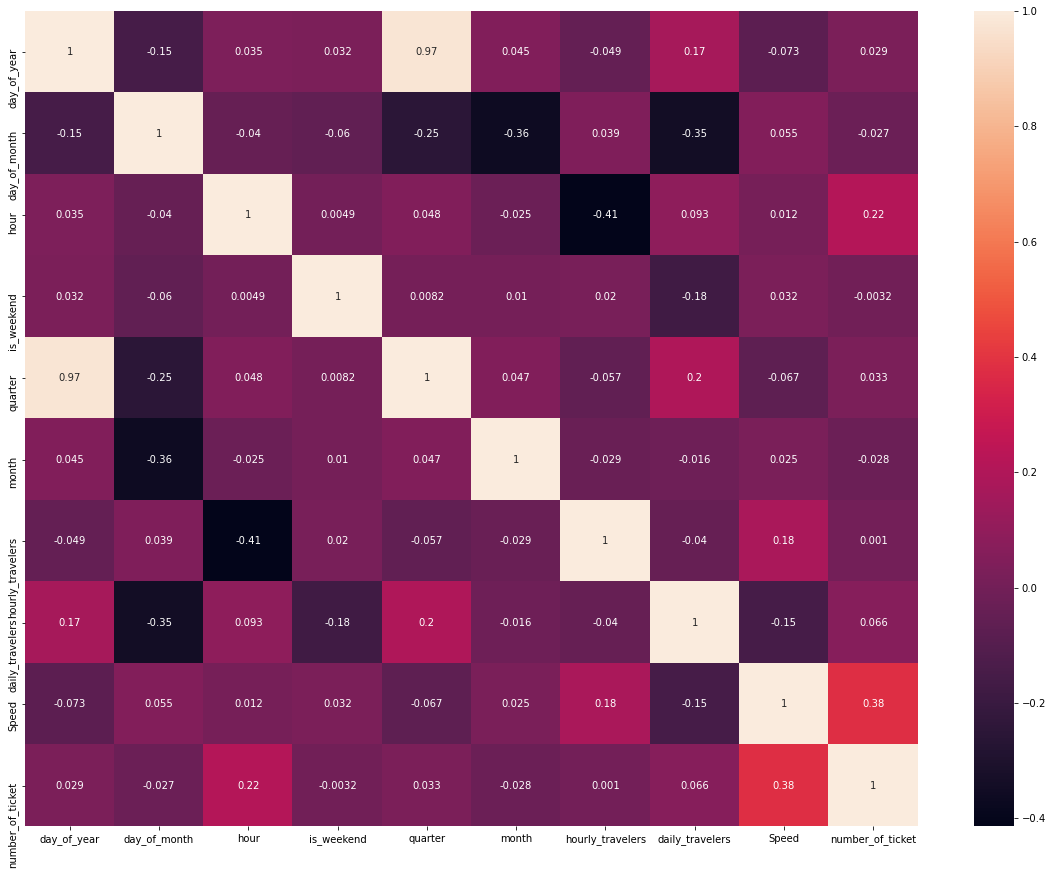

In [123]:
plt.figure(figsize=(20,15))
sns.heatmap((transport_df[['day_of_year', 'day_of_month','hour', 'is_weekend','quarter', 'month', 'hourly_travelers', 'daily_travelers', 'Speed','number_of_ticket']]).corr(), annot=True)

In [124]:
calc_vif(transport_df[[i for i in transport_df.describe().columns if i not in ['travel_from_distance','hourly_travelers','quarter','number_of_ticket','minute','travel_time','year','travel_from_time','day_of_year']]])

,variables,VIF
0,ride_id,21.944120
1,max_capacity,4.436991
2,day_of_week,8.322184
3,day_of_month,8.806071
4,hour,8.516591
5,is_weekend,3.575681
6,month,6.372181
7,daily_travelers,120.672039
8,Speed,204.708349


In [125]:
calc_vif(transport_df[[i for i in transport_df.describe().columns if i not in ['travel_from_distance','daily_travelers','hourly_travelers','quarter','is_rush_hour','number_of_ticket','minute','travel_time','year','travel_from_time']]])

,variables,VIF
0,ride_id,21.968056
1,max_capacity,3.972057
2,day_of_week,8.311855
3,day_of_year,2.763383
4,day_of_month,7.818201
5,hour,8.395563
6,is_weekend,3.493185
7,month,6.286563
8,Speed,44.778029


## Thus we finalize following set of independent variables based on multicollinearity and VIF analysis

In [126]:
final_feature_1 = ['ride_id','max_capacity','day_of_week','day_of_year','day_of_month','hour','is_weekend','month','Speed',]

In [127]:
not_used_cols = ['travel_from_distance','daily_travelers','hourly_travelers','quarter','minute','travel_time','year','travel_from_time']

# Data Tranformation
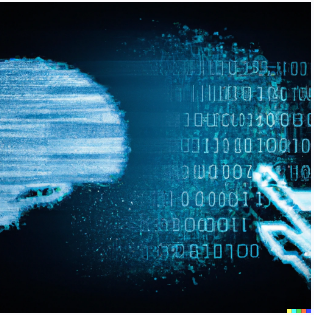
### Encoding categorical features into numerical

In [128]:
transport_df.head(2)

,ride_id,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date,day_of_week,day_of_year,day_of_month,...,is_weekend,year,quarter,month,period,hourly_travelers,daily_travelers,travel_from_distance,travel_from_time,Speed
0,1442,7.25,Migori,Bus,49,1,2017-10-17 07:15:00,1,290,2,...,0,2017,4,3,am,8.494743,0.693147,370.0,428,1.156757
1,5437,7.20,Migori,Bus,49,1,2017-11-19 07:12:00,6,323,2,...,1,2017,4,2,am,8.494743,0.693147,370.0,428,1.156757


In [129]:
new_df_clean = transport_df.drop(not_used_cols,axis=1)

In [130]:
new_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6249 entries, 0 to 6248
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ride_id           6249 non-null   int64         
 1   travel_from       6249 non-null   object        
 2   car_type          6249 non-null   object        
 3   max_capacity      6249 non-null   int64         
 4   number_of_ticket  6249 non-null   int64         
 5   date              6249 non-null   datetime64[ns]
 6   day_of_week       6249 non-null   int64         
 7   day_of_year       6249 non-null   int64         
 8   day_of_month      6249 non-null   int64         
 9   hour              6249 non-null   int64         
 10  is_weekend        6249 non-null   int64         
 11  month             6249 non-null   int64         
 12  period            6249 non-null   object        
 13  Speed             6249 non-null   float64       
dtypes: datetime64[ns](1), fl

In [131]:
new_df_clean.drop(['date'], axis=1,inplace=True)

In [188]:
new_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6249 entries, 0 to 6248
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ride_id           6249 non-null   int64  
 1   travel_from       6249 non-null   object 
 2   car_type          6249 non-null   object 
 3   max_capacity      6249 non-null   int64  
 4   number_of_ticket  6249 non-null   int64  
 5   day_of_week       6249 non-null   int64  
 6   day_of_year       6249 non-null   int64  
 7   day_of_month      6249 non-null   int64  
 8   hour              6249 non-null   int64  
 9   is_weekend        6249 non-null   int64  
 10  month             6249 non-null   int64  
 11  period            6249 non-null   object 
 12  Speed             6249 non-null   float64
dtypes: float64(1), int64(9), object(3)
memory usage: 812.5+ KB


In [189]:
# #import preprocessing module from sklearn
# from sklearn import preprocessing 
# final_df = pd.get_dummies(new_df_clean, columns=['year_woy'])
# # transport_df = pd.get_dummies(transport_df, columns=['travel_from','day_of_month','month','period'])
# #label_enc = {'Bus':1,'shuttle':0}
# #transport_df.replace(label_enc,inplace=True)

In [132]:
final_df = new_df_clean.copy()
final_df.head(2)

,ride_id,travel_from,car_type,max_capacity,number_of_ticket,day_of_week,day_of_year,day_of_month,hour,is_weekend,month,period,Speed
0,1442,Migori,Bus,49,1,1,290,2,7,0,3,am,1.156757
1,5437,Migori,Bus,49,1,6,323,2,7,1,2,am,1.156757


In [133]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6249 entries, 0 to 6248
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ride_id           6249 non-null   int64  
 1   travel_from       6249 non-null   object 
 2   car_type          6249 non-null   object 
 3   max_capacity      6249 non-null   int64  
 4   number_of_ticket  6249 non-null   int64  
 5   day_of_week       6249 non-null   int64  
 6   day_of_year       6249 non-null   int64  
 7   day_of_month      6249 non-null   int64  
 8   hour              6249 non-null   int64  
 9   is_weekend        6249 non-null   int64  
 10  month             6249 non-null   int64  
 11  period            6249 non-null   object 
 12  Speed             6249 non-null   float64
dtypes: float64(1), int64(9), object(3)
memory usage: 812.5+ KB


# Data type conversion from object to numeric

In [134]:
from sklearn import preprocessing
final_df = pd.get_dummies(final_df, columns=['travel_from','car_type'])

In [135]:
final_df.head()

,ride_id,max_capacity,number_of_ticket,day_of_week,day_of_year,day_of_month,hour,is_weekend,month,period,...,travel_from_Migori,travel_from_Ndhiwa,travel_from_Nyachenge,travel_from_Oyugis,travel_from_Rodi,travel_from_Rongo,travel_from_Sirare,travel_from_Sori,car_type_Bus,car_type_shuttle
0,1442,49,1,1,290,2,7,0,3,am,...,1,0,0,0,0,0,0,0,1,0
1,5437,49,1,6,323,2,7,1,2,am,...,1,0,0,0,0,0,0,0,1,0
2,5710,49,1,6,330,3,7,1,2,am,...,0,0,0,0,0,0,0,0,1,0
3,5777,49,5,0,331,3,7,0,2,am,...,0,0,0,0,0,0,0,0,1,0
4,5778,49,31,0,331,3,7,0,2,am,...,1,0,0,0,0,0,0,0,1,0


In [136]:
final_df=pd.get_dummies(final_df,columns=['period'] )

In [137]:
final_df.columns

Index(['ride_id', 'max_capacity', 'number_of_ticket', 'day_of_week',
       'day_of_year', 'day_of_month', 'hour', 'is_weekend', 'month', 'Speed',
       'travel_from_Awendo', 'travel_from_Homa Bay', 'travel_from_Kehancha',
       'travel_from_Kendu Bay', 'travel_from_Keroka', 'travel_from_Keumbu',
       'travel_from_Kijauri', 'travel_from_Kisii', 'travel_from_Mbita',
       'travel_from_Migori', 'travel_from_Ndhiwa', 'travel_from_Nyachenge',
       'travel_from_Oyugis', 'travel_from_Rodi', 'travel_from_Rongo',
       'travel_from_Sirare', 'travel_from_Sori', 'car_type_Bus',
       'car_type_shuttle', 'period_am', 'period_mid', 'period_sundown',
       'period_sunup'],
      dtype='object')

In [138]:
final_df.to_csv("mydata.csv", index=True)

In [139]:
import sweetviz as sv
nairobireport = sv.analyze(final_df)
nairobireport.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [141]:
# Let us find the difference between next and previous buses
# And count the travel per minut trip
def find_difference_bw_bus(transport_df):
  
  transport_df.sort_values(["travel_from","date"],inplace=True,ascending=True)
  transport_df["Time_gap_btw_0_1_next_bus"]=(transport_df["date"]-transport_df.groupby(["travel_from"]).date.shift(-1)).dt.total_seconds()/3600
  transport_df["Time_gap_btw_0_1_previous_bus"]=(transport_df["date"]-transport_df.groupby(["travel_from"]).date.shift(1)).dt.total_seconds()/3600
  transport_df["Time_gap_btw_0_2_next_bus"]=(transport_df["date"]-transport_df.groupby(["travel_from"]).date.shift(-2)).dt.total_seconds()/3600
  transport_df["Time_gap_btw_0_2_previous_bus"]=(transport_df["date"]-transport_df.groupby(["travel_from"]).date.shift(2)).dt.total_seconds()/3600
  transport_df["Time_gap_btw_0_3_next_bus"]=(transport_df["date"]-transport_df.groupby(["travel_from"]).date.shift(-3)).dt.total_seconds()/3600
  transport_df["Time_gap_btw_0_3_previous_bus"]=(transport_df["date"]-transport_df.groupby(["travel_from"]).date.shift(3)).dt.total_seconds()/3600
  transport_df["Time_gap_btw_next_previous_bus"]=(transport_df.groupby(["travel_from"]).date.shift(-1)-transport_df.groupby(["travel_from"]).date.shift(1)).dt.total_seconds()/3600
  cols=["Time_gap_btw_0_1_next_bus", "Time_gap_btw_0_1_previous_bus", "Time_gap_btw_0_2_next_bus","Time_gap_btw_0_2_previous_bus",
      "Time_gap_btw_0_3_next_bus", "Time_gap_btw_0_3_previous_bus",
      "Time_gap_btw_next_previous_bus"]
  transport_df[cols]=transport_df.groupby(["travel_from"])[cols].fillna(method="ffill")
  transport_df[cols]=transport_df.groupby(["travel_from"])[cols].fillna(method="backfill")

  
  return transport_df

In [142]:
final_df = find_difference_bw_bus(transport_df)

In [143]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6249 entries, 502 to 5884
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   ride_id                         6249 non-null   int64         
 1   travel_time                     6249 non-null   float64       
 2   travel_from                     6249 non-null   object        
 3   car_type                        6249 non-null   object        
 4   max_capacity                    6249 non-null   int64         
 5   number_of_ticket                6249 non-null   int64         
 6   date                            6249 non-null   datetime64[ns]
 7   day_of_week                     6249 non-null   int64         
 8   day_of_year                     6249 non-null   int64         
 9   day_of_month                    6249 non-null   int64         
 10  hour                            6249 non-null   int64         
 11  mi

In [144]:
final_df.columns

Index(['ride_id', 'travel_time', 'travel_from', 'car_type', 'max_capacity',
       'number_of_ticket', 'date', 'day_of_week', 'day_of_year',
       'day_of_month', 'hour', 'minute', 'is_weekend', 'year', 'quarter',
       'month', 'period', 'hourly_travelers', 'daily_travelers',
       'travel_from_distance', 'travel_from_time', 'Speed',
       'Time_gap_btw_0_1_next_bus', 'Time_gap_btw_0_1_previous_bus',
       'Time_gap_btw_0_2_next_bus', 'Time_gap_btw_0_2_previous_bus',
       'Time_gap_btw_0_3_next_bus', 'Time_gap_btw_0_3_previous_bus',
       'Time_gap_btw_next_previous_bus'],
      dtype='object')

In [145]:
time = {'Migori': 7*60+8 , 'Keroka': 5*60, 'Homa Bay':7*60, 'Kisii':5*60+34, 'Keumbu':5*60+20, 'Rongo':6*60+21,
'Kijauri':60*4+50,'Oyugis':5*60+50, 'Awendo':6*60+38, 'Sirare':7*60+30, 'Nyachenge':6*60+10, 'Kehancha':7*60+10,
'Kendu Bay':6*60+10, 'Sori':7*60+30, 'Rodi':6*60+40, 'Mbita':7*60+23, 'Ndhiwa': 7*60}
for key in time.keys(): 
    time[key]=timedelta( minutes=time[key])

#find the date of traveling from origin 
final_df["Date_of_traveling_from_origin"]=final_df.travel_from.map(time)

# find the date of arrival at distination
final_df["arrival_date"]=final_df.date+ final_df.Date_of_traveling_from_origin
final_df["hod_arrived_date"]=final_df["arrival_date"].dt.hour
final_df["minute_arrived_date"]=final_df["arrival_date"].dt.minute
del final_df["Date_of_traveling_from_origin"],final_df["arrival_date"]
final_df["is_rush_hour"]=0
final_df.loc[final_df.hod_arrived_date.between(7,17),"is_rush_hour"]=1

In [146]:
final_df.dropna(axis=0,inplace=True)

In [147]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6246 entries, 502 to 5884
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   ride_id                         6246 non-null   int64         
 1   travel_time                     6246 non-null   float64       
 2   travel_from                     6246 non-null   object        
 3   car_type                        6246 non-null   object        
 4   max_capacity                    6246 non-null   int64         
 5   number_of_ticket                6246 non-null   int64         
 6   date                            6246 non-null   datetime64[ns]
 7   day_of_week                     6246 non-null   int64         
 8   day_of_year                     6246 non-null   int64         
 9   day_of_month                    6246 non-null   int64         
 10  hour                            6246 non-null   int64         
 11  mi

In [148]:
cat_features = ['travel_from','period']
final_df = pd.get_dummies(final_df, columns=cat_features)

In [149]:
label_enc = {'Bus':1, 'shuttle':0}
final_df.car_type.replace(label_enc, inplace= True)

In [150]:
final_df.columns

Index(['ride_id', 'travel_time', 'car_type', 'max_capacity',
       'number_of_ticket', 'date', 'day_of_week', 'day_of_year',
       'day_of_month', 'hour', 'minute', 'is_weekend', 'year', 'quarter',
       'month', 'hourly_travelers', 'daily_travelers', 'travel_from_distance',
       'travel_from_time', 'Speed', 'Time_gap_btw_0_1_next_bus',
       'Time_gap_btw_0_1_previous_bus', 'Time_gap_btw_0_2_next_bus',
       'Time_gap_btw_0_2_previous_bus', 'Time_gap_btw_0_3_next_bus',
       'Time_gap_btw_0_3_previous_bus', 'Time_gap_btw_next_previous_bus',
       'hod_arrived_date', 'minute_arrived_date', 'is_rush_hour',
       'travel_from_Awendo', 'travel_from_Homa Bay', 'travel_from_Kehancha',
       'travel_from_Keroka', 'travel_from_Keumbu', 'travel_from_Kijauri',
       'travel_from_Kisii', 'travel_from_Mbita', 'travel_from_Migori',
       'travel_from_Ndhiwa', 'travel_from_Nyachenge', 'travel_from_Rodi',
       'travel_from_Rongo', 'travel_from_Sirare', 'travel_from_Sori',
       'peri

In [313]:
dependent_variable='number_of_ticket'
independent_variables = ['ride_id', 'travel_time', 'car_type', 'max_capacity',
       'day_of_week', 'day_of_year',
       'day_of_month', 'hour', 'minute', 'is_weekend', 'year', 'quarter',
       'month', 'hourly_travelers', 'daily_travelers', 'travel_from_distance',
       'travel_from_time', 'Speed', 'Time_gap_btw_0_1_next_bus',
       'Time_gap_btw_0_1_previous_bus', 'Time_gap_btw_0_2_next_bus',
       'Time_gap_btw_0_2_previous_bus', 'Time_gap_btw_0_3_next_bus',
       'Time_gap_btw_0_3_previous_bus', 'Time_gap_btw_next_previous_bus',
       'hod_arrived_date', 'minute_arrived_date', 'is_rush_hour',
       'travel_from_Awendo', 'travel_from_Homa Bay', 'travel_from_Kehancha', 'travel_from_Keroka', 'travel_from_Keumbu',
       'travel_from_Kijauri', 'travel_from_Kisii', 'travel_from_Mbita',
       'travel_from_Migori', 'travel_from_Ndhiwa', 'travel_from_Nyachenge',
        'travel_from_Rodi', 'travel_from_Rongo',
       'travel_from_Sirare', 'travel_from_Sori', 'period_am', 'period_mid',
       'period_sundown', 'period_sunup']

In [314]:
X = final_df[independent_variables].values

# Create the data of dependent variable
y = final_df[dependent_variable].values

In [346]:
# import matplotlib.pyplot as plt
# import numpy as np
# from sklearn.linear_model import RidgeCV

# ridge = RidgeCV(alphas=[0.001,0.01,1,10]).fit(X, y)
# importance = np.abs(ridge.coef_)
# feature_names = np.array(independent_variables)
# plt.figure(figsize=(20,10))
# plt.bar(height=importance, x=feature_names)
# plt.xticks(rotation=90)
# plt.title("Feature importances via coefficients")
# plt.show()

In [347]:
# a=pd.DataFrame(list(zip(feature_names,importance)))

In [348]:
# a.sort_values(by=1)

In [ ]:
# Create list of independent and dependent variables based on feature selection by RidgeCV

In [349]:
# indep_new=['max_capacity',	'Speed','travel_from_Awendo','hour','day_of_month_1','travel_from_distance','travel_from_time',	'hod_arrived_date','is_weekend','day_of_month_3','hourly_travelers','quarter','month_2','period_mid','travel_from_Oyugis',	'travel_from_Kendu Bay','travel_from_Kehancha',	'period_am','travel_from_Kijauri','daily_travelers','travel_from_Keroka',	'travel_from_Ndhiwa','travel_from_Kisii','period_sundown','period_sunup','travel_from_Rodi','travel_from_Rongo','travel_from_Homa Bay','travel_from_Mbita','travel_from_Migori','travel_from_Nyachenge','travel_from_Sirare','travel_from_Sori']

In [350]:
# dep_new='number_of_ticket'

In [351]:
# X = transport_df[indep_new].values

# # # Create the data of dependent variable
# y = transport_df[dep_new].values

In [352]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import f_regression
# X_new = SelectKBest(f_regression, k=5).fit_transform(X, y)
# X_new.shape

# Now let us split the data into train and test dataset

In [155]:
#import the necessary ML libraries
from scipy.stats import zscore
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error 
import math
from sklearn.ensemble import RandomForestRegressor
#import lightgbm as lgb


In [156]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [157]:
X_train

array([[8.14900000e+03, 7.13333333e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.30040000e+04, 7.21666667e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.64700000e+03, 9.66666667e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.32610000e+04, 8.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.55400000e+03, 7.08333333e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.94100000e+03, 7.06666667e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [158]:
print(X_train.shape)
print(X_test.shape)

(4184, 47)
(2062, 47)


# let us Standardize the data

In [159]:
# from sklearn.preprocessing import StandardScaler
# scaler = preprocessing.StandardScaler()
# X_train = scaler.fit(X_train)
# X_train.shape
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)

array([[-0.78926809, -0.37466581,  0.97871594, ..., -0.11959528,
        -0.22050296, -0.43432288],
       [ 1.33480088, -0.34645093,  0.97871594, ..., -0.11959528,
        -0.22050296, -0.43432288],
       [-0.57139242,  0.48306651, -1.02174693, ..., -0.11959528,
        -0.22050296, -0.43432288],
       ...,
       [ 1.44723872, -0.08123107,  0.97871594, ..., -0.11959528,
        -0.22050296, -0.43432288],
       [-1.04958138, -0.39159474,  0.97871594, ..., -0.11959528,
        -0.22050296, -0.43432288],
       [-0.44276703, -0.39723771,  0.97871594, ..., -0.11959528,
        -0.22050296, -0.43432288]])

# Fit the Linear Regression model on data

In [160]:
model = LinearRegression()
model.fit(X_train, y_train)
  # Predicting 
y_pred = model.predict(X_test)
  #Find R-squared value
r2 = r2_score(y_test, y_pred)
  # Find Adjusted R-squared value
adj_r2=1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

In [161]:
adj_r2

0.3474484813277523

In [162]:
r2

0.3623295688472068

In [163]:
model.score(X_train, y_train)

0.4275870257736568

In [164]:
model.coef_

array([ 1.63151834e-04, -1.42451571e-01, -1.68463746e-03, -6.40162236e-02,
        3.45009120e-02,  7.84112131e-03, -5.07844507e-01, -1.42359467e-01,
       -5.52624491e-03,  1.15058186e-01, -9.50882860e-01, -7.85097007e-01,
       -1.20736735e-01, -3.80964630e-01,  2.12647326e+00, -1.93480815e-01,
        2.35323193e-01, -7.14498354e-02,  2.76864481e-03, -5.36281688e-04,
        3.37499639e-04,  2.17684357e-04,  3.82022877e-04, -3.48168621e-04,
        2.03442533e-03, -2.62951588e-01,  3.14827612e-03, -3.40970497e+00,
       -1.34309763e-01,  4.69971579e+00,  1.59000905e-01,  1.56123985e+00,
        1.33266295e-01,  1.36328287e+00,  2.39463062e+00,  4.45887041e+00,
        6.00000155e+00, -2.45205502e+00, -5.67709560e+00, -3.69520992e+00,
       -4.86316008e+00,  7.83458735e+00, -1.17827653e+01,  1.36146965e+00,
       -6.86905023e-01,  3.40970497e+00, -4.08426960e+00])

In [165]:
model.intercept_

1908.7837067202497

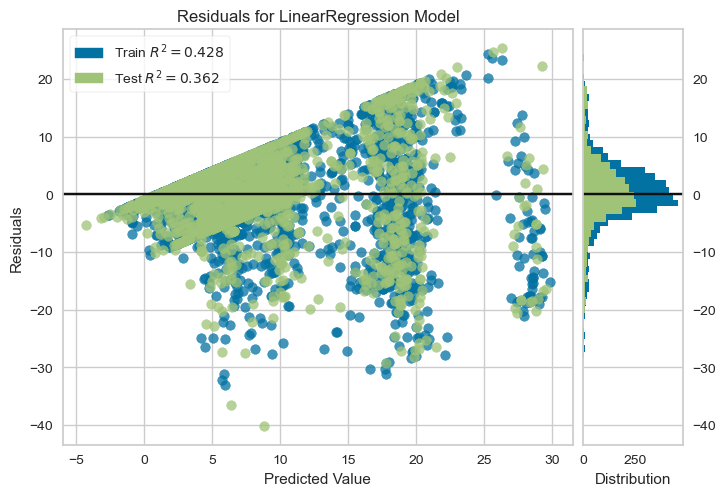

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [166]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()       

In [365]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=.5)
reg.fit(X_train,y_train)

Ridge(alpha=0.5)

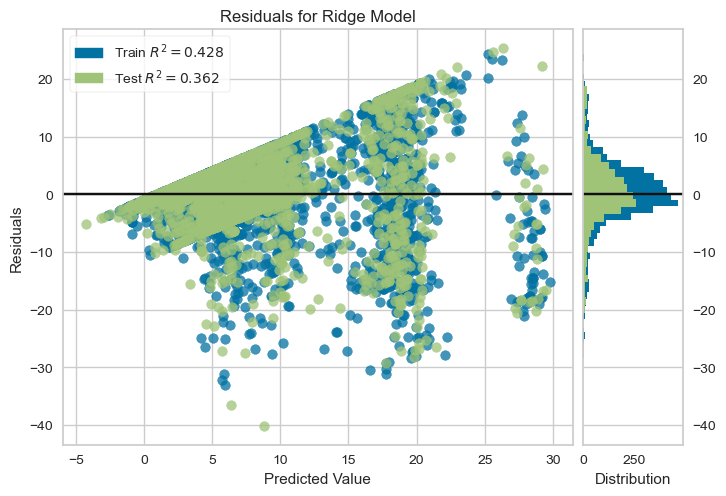

<AxesSubplot:title={'center':'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [366]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(reg)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()       

In [167]:
r2 = r2_score(y_test, y_pred)
  # Find Adjusted R-squared value
adj_r2=1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

In [168]:
print(r2)
print(adj_r2)

0.3623295688472068
0.3474484813277523


## We see that the Linear regression model performs poorly on the above data. So we will try other variations of regression.

In [169]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.1)

In [170]:
reg.fit(X_train,y_train)

Lasso(alpha=0.1)

In [171]:
r2 = r2_score(y_test, y_pred)
  # Find Adjusted R-squared value
adj_r2=1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

In [172]:
adj_r2

0.3474484813277523

# Polynomial regression

In [173]:
from sklearn.preprocessing import PolynomialFeatures
  
poly = PolynomialFeatures(degree =3)
X_poly = poly.fit_transform(X_train)
  
poly.fit(X_poly, y_train)
lin2 = LinearRegression()
lin2.fit(X_poly, y_train)

LinearRegression()

In [174]:
r2 = r2_score(y_test, y_pred)
  # Find Adjusted R-squared value
adj_r2=1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

In [175]:
adj_r2

0.3474484813277523

## Thus, we note that we do not get good regression model by using linear regression algorithms.

In [176]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)
X_new = SelectKBest(f_regression, k=5).fit_transform(X, y)
X_new.shape
#print(X_new)
# filter = X_new.get_support()
# features = np.array(independent_variables)
 
# print("All features:")
# print(features)
 
# print("Selected best 8:")
# print(features[filter])
# print(z) 

(6246, 5)

In [177]:
model2 = LinearRegression()
model2.fit(X_new, y)
  # Predicting 
y_pred = model.predict(X_test)
  #Find R-squared value
r2 = r2_score(y_test, y_pred)
  # Find Adjusted R-squared value
adj_r2=1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

In [178]:
r2

0.3623295688472068

In [179]:
adj_r2

0.3474484813277523

In [180]:
from sklearn.kernel_ridge import KernelRidge

krr = KernelRidge(alpha=1.0,kernel="poly")
krr.fit(X_train, y_train)

KernelRidge(alpha=1.0, kernel='poly')

In [181]:
y_pred = model.predict(X_test)
  #Find R-squared value
r2 = r2_score(y_test, y_pred)
  # Find Adjusted R-squared value
adj_r2=1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

In [182]:
r2

0.3623295688472068

## Thus, we note that we do not get good regression model by using linear regression algorithms.

# Using gradient boost regressor

In [183]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [184]:
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)
  # Predicting 
y_pred = reg.predict(X_test)
y_pred_train=reg.predict(X_train)
  

  # Find Adjusted R-squared value
adj_r2=1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  
 #Find R-squared value
r2 = r2_score(y_test, y_pred)
r2_for_train= r2_score(y_train,y_pred_train)
train_score = reg.score(X_train, y_train)
test_score = reg.score(X_test,y_test)

print(f'Train score: {train_score}')
print(f'Test score: {test_score}')
print(f'r2_Test score: {r2}')
print(f'r2_train score: {r2_for_train}')
#print_metrics(y_test, y_pred)


Train score: 0.6948092124259759
Test score: 0.6178593407468708
r2_Test score: 0.6178593407468708
r2_train score: 0.6948092124259759


In [185]:
import math
def print_metrics(actual, predicted):
  print('MSE is {}'.format(mean_squared_error(actual, predicted)))
  print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
  print('RMSE is {}'.format(r2_score(actual, predicted)))
  print('MAE is {}'.format(mean_absolute_error(actual, predicted)))
  print('MAPE is {}'.format(np.mean(np.abs((actual - predicted) / actual)) * 100))

# using xgboost

In [186]:
import xgboost as xgb

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)
dreg= xgb.XGBRegressor(
                        booster= 'gbtree',
                        colsample_bylevel= 1,
                        colsample_bynode= 1,
                        colsample_bytree= 0.7,
                        eta= 0.006,
                        gamma= 0.01,
                        importance_type= 'gain',
                        learning_rate= 0.8,
                        max_delta_step= 1,
                        max_depth= 10,
                        min_child_weight= 10,
                        n_estimators= 100,
                        n_jobs= 7,
                        objective= 'reg:linear',
                        random_state= 10,
                        reg_alpha= 0.01,
                        reg_lambda= 1,
                        scale_pos_weight= 1,
                        subsample= 1,
                        verbosity= 1)
dreg.fit(X_train, y_train)
y_pred_train=dreg.predict(X_train)
y_pred = dreg.predict(X_test)
#Find R-squared value
r2 = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, y_pred_train)
# Find Adjusted R-squared value
adj_r2=1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
train_score = dreg.score(X_train, y_train)
test_score = dreg.score(X_test,y_test)
print(f'Train score: {train_score}')
print(f'Test score: {test_score}')

[12:11:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
Train score: 0.9929487300790779
Test score: 0.6209389463542827


# We are getting better model score using xgboost. 
**The reason why linear regression model not worked properly could be because there is very less correlation between the dependent and independent variables.**


**Also the high train accuracy and lower test accuracy suggests that there is overfitting in the data.** 
* There is also no significant linear relationship seen in pairplot


In [191]:
import math
def print_metrics(actual, predicted):
  print('MSE is {}'.format(mean_squared_error(actual, predicted)))
  print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
  print('RMSE is {}'.format(r2_score(actual, predicted)))
  print('MAE is {}'.format(mean_absolute_error(actual, predicted)))
  print('MAPE is {}'.format(np.mean(np.abs((actual - predicted) / actual)) * 100))

In [192]:
print(adj_r2, r2, r2_train)

0.6091715292331805 0.6209389463542827 0.9929487300790779


In [193]:
from sklearn import decomposition
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# using Decision Tree

In [194]:
#regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
#regr_1.fit(X, y)
regr_2.fit(X, y)

DecisionTreeRegressor(max_depth=5)

In [195]:
y_pred = regr_2.predict(X_test)
#y_2 = regr_2.predict(X_test)

In [196]:
y_pred

array([19.63793103,  2.44220817,  9.568     , ...,  9.37605178,
        8.22033898,  9.37605178])

In [197]:
r2 = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, y_pred_train)
# Find Adjusted R-squared value
adj_r2=1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
train_score = dreg.score(X_train, y_train)
test_score = dreg.score(X_test,y_test)
print(f'Train score: {train_score}')
print(f'Test score: {test_score}')

Train score: 0.9929487300790779
Test score: 0.6209389463542827


# Random Forest Regression

In [198]:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [199]:
dec_reg =RandomForestRegressor()

In [200]:
dec_reg.fit(X_train,y_train)

RandomForestRegressor()

In [201]:
dec_reg.score(X_train,y_train)

0.9521540934124935

In [202]:
dec_reg.score(X_test,y_test)

0.6693026966138274

* Here we see a large difference between the train and test dataset accuracy.
* hence we can say model is overfitted.
* So, we need to implement grid search cv to get optimized parameters.

In [203]:
parameters = {  'ccp_alpha':[0.01,0.1,1,10,100],
              'max_depth': [3, 5, 7],
            'min_samples_leaf': [40, 60],
            'min_samples_split': [50, 115, 150] }

In [204]:

dec_reg =RandomForestRegressor()
rf_grid =GridSearchCV(dec_reg,param_grid=parameters, verbose=1,cv=2)
rf_grid.fit(X, y)

Fitting 2 folds for each of 90 candidates, totalling 180 fits


GridSearchCV(cv=2, estimator=RandomForestRegressor(),
             param_grid={'ccp_alpha': [0.01, 0.1, 1, 10, 100],
                         'max_depth': [3, 5, 7], 'min_samples_leaf': [40, 60],
                         'min_samples_split': [50, 115, 150]},
             verbose=1)

In [205]:
rf_grid.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.01,
 'criterion': 'squared_error',
 'max_depth': 7,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 40,
 'min_samples_split': 115,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [206]:
rf_optimal_model =rf_grid.best_estimator_
rf_train_preds = rf_optimal_model.predict(X_train)
rf_test_preds = rf_optimal_model.predict(X_test)
train_score= rf_optimal_model.score(X_train,y_train)
test_score = rf_optimal_model.score(X_test,y_test)



#Find R-squared value
r2 = r2_score(y_test, rf_test_preds)
r2_train = r2_score(y_train, rf_train_preds)
# Find Adjusted R-squared value
adj_r2=1-(1-r2_score(y_test,rf_test_preds))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

print('Train Score: ',train_score)
print('Test Score: ',test_score)
print('Mean Squared Error (MSE): ',mean_squared_error(y_test, rf_test_preds))
print('Mean Absolute Error (MAE): ',mean_absolute_error(y_test, rf_test_preds))
print('Root Mean Squared Error (MSE): ',np.sqrt(mean_squared_error(y_test, rf_test_preds)))
print('R2 Score: ',r2)
print('R2_train Score: ',r2_train)
print('Adjusted R2 Score: ',adj_r2)

Train Score:  0.6276995049233154
Test Score:  0.6142841678558513
Mean Squared Error (MSE):  28.947600517582885
Mean Absolute Error (MAE):  3.42146303872824
Root Mean Squared Error (MSE):  5.380297437649975
R2 Score:  0.6142841678558513
R2_train Score:  0.6276995049233154
Adjusted R2 Score:  0.6052828549905211


# Adaboost

In [207]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=4), n_estimators=125,learning_rate=8.0,
    loss='exponential', random_state=None
)

regr_2.fit(X_train, y_train)
#regr_2.fit(X_train, y_train)
y_pred = regr_2.predict(X_test)
#y_2 = regr_2.predict(X_test)

In [208]:
#Find R-squared value
r2 = r2_score(y_test, y_pred)
#r2_train = r2_score(y_train, y_pred)
# Find Adjusted R-squared value
adj_r2=1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

print('Train Score: ',train_score)
print('Test Score: ',test_score)
print('Mean Squared Error (MSE): ',mean_squared_error(y_test, y_pred))
print('Mean Absolute Error (MAE): ',mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error (MSE): ',np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score: ',r2)
print('R2_train Score: ',r2_train)
print('Adjusted R2 Score: ',adj_r2)

Train Score:  0.6276995049233154
Test Score:  0.6142841678558513
Mean Squared Error (MSE):  56.03447084284142
Mean Absolute Error (MAE):  5.453265784374648
Root Mean Squared Error (MSE):  7.4856175992927545
R2 Score:  0.25336186200387945
R2_train Score:  0.6276995049233154
Adjusted R2 Score:  0.23593783395729662


# Implementing GriSearchCv
* still the accuracy is very low. 
* To fix this, let us implement hyperparameter tuning techniques.
* GridSearchCV will help us determine the optimum parameters

In [315]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=100)

In [338]:
import xgboost as xgb

xgb = xgb.XGBRegressor()
params = {"min_child_weight":[10,15,20], 
            'eta': [0.06,0.04,4,40], 
            'colsample_bytree':[0.7],
             'learning_rate':[ 0.1,0.15,0.25,1.0],
             'n_estimators': [100,150,200], 
            'max_depth': [5,6,7],
          
          }

In [317]:
# import xgboost as xgb

# xgb = xgb.XGBRegressor()
# params = {"min_child_weight":[10,20,30], 
#             'eta': [0.004,0.04,40], 
#             'colsample_bytree':[0.5,0.6,0.7],
#              'learning_rate':[ 0.1,0.15,1.0],
#              'n_estimators': [100,200,300], 
#             'max_depth': [7,9,11],
          
#           }

In [318]:
# import xgboost as xgb

# xgb = xgb.XGBRegressor()
# params = {"min_child_weight":[30,40], 
#             'eta': [0.006,0.06,6,60], 
#             'colsample_bytree':[0.5], 
#             'max_depth': [7,9,11],
          
#           }

In [508]:
# import xgboost as xgb

# xgb = xgb.XGBRegressor()
# params = {"min_child_weight":[50,60,70], 
#             'eta': [0.004,0.04,4,40], 
#              'learning_rate':[ 0.1,0.15,1.0],
#             'colsample_bytree':[0.7], 
#             'max_depth': [3,6,9,10],
          
#           }

In [339]:
# X = data[features].copy()
# y = data['number_of_ticket'].copy()

# # X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)
reg_gs = GridSearchCV(xgb,param_grid=params, verbose=1,cv=3,n_jobs=-1)
reg_gs.fit(X, y)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n...
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    validate_parameters=None, verbosity=None),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7], 'eta': [0.06, 0.04, 4, 40],
                         'learning_rate': [0.1, 0.15, 0.25, 1.0],
                         'max_depth': [5, 6, 7],
                         'min_child_weight': [10, 15, 20],
                         'n_estimators': [100, 150, 200]},
             verbose=1)

In [340]:
reg_gs.best_estimator_.get_params()

{'objective': 'reg:squarederror',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.7,
 'enable_categorical': False,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 5,
 'min_child_weight': 20,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 2,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None,
 'eta': 0.06}

In [341]:
reg_optimal_model =reg_gs.best_estimator_

In [342]:
train_preds = reg_optimal_model.predict(X_train)
test_preds = reg_optimal_model.predict(X_test)

In [343]:
reg_optimal_model.score(X_train,y_train)

0.7593968457949716

In [344]:
reg_optimal_model.score(X_test,y_test)

0.7593585509319353

In [345]:
#Find R-squared value
r2_test = r2_score(y_test, test_preds)
# Find Adjusted R-squared value
adj_r2=1-(1-r2_score(y_test, test_preds))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

In [346]:
adj_r2

0.749949109911803

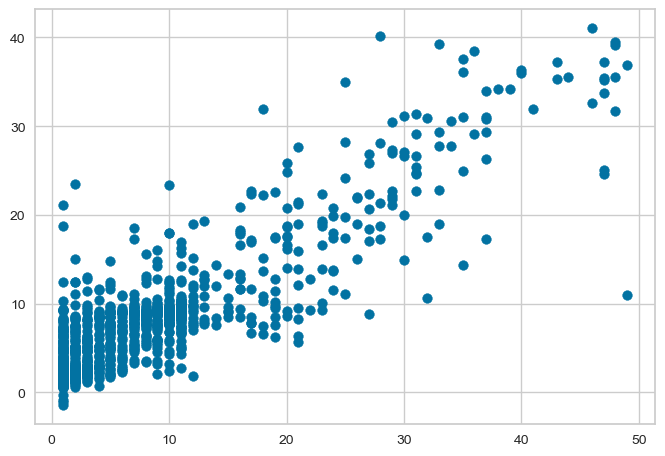

In [347]:
plt.scatter(y_test,test_preds)

In [348]:
importances = reg_optimal_model.feature_importances_

In [349]:
importance_dict = {'Feature' : list(X_train),
                   'Feature Importance' : importances}



In [350]:
print('Mean Squared Error (MSE): ',mean_squared_error(y_test, test_preds))
print('Mean Absolute Error (MAE): ',mean_absolute_error(y_test, test_preds))
print('Root Mean Squared Error (MSE): ',np.sqrt(mean_squared_error(y_test, test_preds)))
print('R2 Score: ',r2_test)
print('Adjusted R2 Score: ',adj_r2)

Mean Squared Error (MSE):  18.92754020972678
Mean Absolute Error (MAE):  2.8214761928796768
Root Mean Squared Error (MSE):  4.350579295878513
R2 Score:  0.7593585509319353
Adjusted R2 Score:  0.749949109911803


# As we are getting highest accuracy in training as well as testing, we will save this model for future use.

In [351]:
# Save the File
import pickle

model_filename = "reg_optimal_model75.sav"

saved_model = pickle.dump(reg_optimal_model, open(model_filename,'wb'))

print('Model is saved into to disk successfully Using Pickle')

Model is saved into to disk successfully Using Pickle


# We will also try prediction using neural networks

In [224]:
!pip install keras

You should consider upgrading via the 'c:\programdata\anaconda3\python.exe -m pip install --upgrade pip' command.


In [331]:
from keras import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization

In [358]:
model=Sequential()
model.add(Dense(12,input_dim=47,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(1,activation='softmax'))
model.add(Dense(8,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation=None))

In [359]:
model.compile(loss='mse',optimizer='adam',metrics= ['accuracy', 'mse'])

In [360]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_66 (Dense)            (None, 12)                576       
                                                                 
 batch_normalization_8 (Batc  (None, 12)               48        
 hNormalization)                                                 
                                                                 
 dropout_15 (Dropout)        (None, 12)                0         
                                                                 
 dense_67 (Dense)            (None, 1)                 13        
                                                                 
 dense_68 (Dense)            (None, 8)                 16        
                                                                 
 dropout_16 (Dropout)        (None, 8)                 0         
                                                     

In [361]:
model.fit(X_train, y_train,epochs=200,batch_size=50)

Epoch 1/200
100/100 [==============================] - 2s 4ms/step - loss: 142.6324 - accuracy: 0.0000e+00 - mse: 142.6324
Epoch 2/200
100/100 [==============================] - 0s 4ms/step - loss: 132.2784 - accuracy: 0.1183 - mse: 132.2784
Epoch 3/200
100/100 [==============================] - 0s 4ms/step - loss: 121.7000 - accuracy: 0.2240 - mse: 121.7000
Epoch 4/200
100/100 [==============================] - 0s 4ms/step - loss: 110.6309 - accuracy: 0.2334 - mse: 110.6309
Epoch 5/200
100/100 [==============================] - 0s 4ms/step - loss: 99.3601 - accuracy: 0.2340 - mse: 99.3601
Epoch 6/200
100/100 [==============================] - 0s 4ms/step - loss: 90.9463 - accuracy: 0.2326 - mse: 90.9463
Epoch 7/200
100/100 [==============================] - 0s 4ms/step - loss: 84.8243 - accuracy: 0.2354 - mse: 84.8243
Epoch 8/200
100/100 [==============================] - 0s 4ms/step - loss: 80.6971 - accuracy: 0.2354 - mse: 80.6971
Epoch 9/200
100/100 [==============================]

In [ ]:
model.evaluate(X_train,y_train)

In [337]:
model.evaluate(X_test,y_test)

40/40 [==============================] - 0s 3ms/step - loss: -115.4550 - accuracy: 0.2240 - mse: 114.3698


[-115.45503997802734, 0.2240000069141388, 114.36982727050781]

In [535]:
# Function to make a dataframe of evaluation matrics for a model
def make_dataFrame(model, df,Model_name,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_train):
  
  '''This function takes arugment as model name and training and testing
    data and a datafram and returns a dataframe after appending the entries of
    evaluation matrics for a model  
  '''
  df = pd.DataFrame(columns=['Model Name','Train Score','test_score','R2 Score','Adjusted R2 Score','MSE','MAE'])
  model_train_preds = model.predict(X_train)
  model_test_preds = model.predict(X_test)



  train_score = model.score(y_train,model_train_preds)
  test_score = model.score(y_test,model_test_preds)
  r2 = r2_score(y_test,model_trainProb_preds)
  adjusted_r2 = 1-(1-r2_score(y_test, model_test_preds))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  mse =  mean_squared_error(y_test, model_train_preds)
  mae = mean_absolute_error(y_test, model_train_preds)
  metrix_dict = {'model_name':Model_name,
                 'Train Score':train_score,
                 'Test Score':test_score,
                 'R2 Score':r2, 
                 'Adjusted R2 Score':adjusted_r2,
                 'MSE':mse,
                 'MAE':mae,
               }
  df = df.append(metrix_dict,ignore_index = True)
  return df

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [537]:
# Save the File
import pickle

model_filename = "reg_optimal_model.sav"

saved_model = pickle.dump(reg_optimal_model, open(model_filename,'wb'))

print('Model is saved into to disk successfully Using Pickle')

Model is saved into to disk successfully Using Pickle


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***